# Student Habits vs Academic Performance
Authors: 
- Christopher Tangonan
- Edward Torres
- Guillermo Zendejas
- Victoria Ramirez


### Introduction
Students usually have busy lives while enrolled in school. Many of their habits can affect their perfomances in their classes, espeically when taking an exam in any of their classes. In this project, we will look to determine a relationship between a student’s habits and possibly predict their exam score based on those habits. Habits, such as a student's sleep hours, study time, attendance percentage, exercise frequency, and extracurricular participation, will be analzyed. We will be using the “Student Habits vs Academic Performance” dataset from Kaggle. First, we’ll load and clean the data in pandas (check for nulls, basic sanity checks), then explore relationships with matplotlib (histograms, scatterplots, correlation). As we complete additional class modules on data wrangling, kNN, and linear regression, we expect to use additional methods to further analyze our data to predict student performance. We will interpret the results to answer our question about the relationship between the students' habits and their final score performance.

### Dataset 
We will be using the “Student Habits vs Academic Performance” dataset which was obtained from Kaggle. It was downloaded on May 25th at 7:30 pm and the last update was about a month before we downloaded it. The author of the data is Jayantha Nath. It is simulated data with 1000 synthetic student records. There are a total of 1000 rows and 16 columns. Each student is provided with a student ID, age, and gender to identify them in columns 0, 1, and 2. Columns 3 through 14 represent the habits that students can partake in that can affect their exam scores. These habits range from hours studying to the number of hours they spend watching Netflix.  Exam scores are given in the last column.

See below for a quick overview of the dataset. 

In [1]:

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore


# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

In [2]:
# read database
df = pd.read_csv("./src/student_habits_performance.csv", index_col=0)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, S1000 to S1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   i

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score  
count           1000.000000  1000.000000  
mean               5.438000    69.601500  
std                2.847501    16.888564  
min                1.000000    18.400000  
25%                3.000000    58.475000  
50%                5.000000    70.500000  
75%                8.000000    81.325000  
max               10.000000   100.000000

## Pre-processing and Cleaning the Data

In [3]:
df_nums = df.select_dtypes(include='number')
df_cats = df.select_dtypes(exclude='number')
# check for missing values
print(f'Missing values check(nums):\n{df_nums.isnull().sum()}')
print(f'Missing values check(cats):\n{df_cats.isnull().sum()}')
# NOTE: 'parental_education_level' contains missing values, will be handled
df_cats['parental_education_level'].fillna('unknown', inplace=True)
df['parental_education_level'] = df_cats['parental_education_level']


# check for duplicates
print(f'Duplicate check:\n{df_nums.duplicated().sum()}')
# check for outliers
print(f'Outliers check:\n{df_nums.apply(lambda x: np.abs(x - x.mean()) > (3 * x.std())).sum()}')
# check for unique values in categorical columns
print(f'Unique values check:\n{df_cats.apply(lambda x: x.unique()).head(10)}')

Missing values check(nums):
age                      0
study_hours_per_day      0
social_media_hours       0
netflix_hours            0
attendance_percentage    0
sleep_hours              0
exercise_frequency       0
mental_health_rating     0
exam_score               0
dtype: int64
Missing values check(cats):
gender                            0
part_time_job                     0
diet_quality                      0
parental_education_level         91
internet_quality                  0
extracurricular_participation     0
dtype: int64
Duplicate check:
0
Outliers check:
age                      0
study_hours_per_day      2
social_media_hours       3
netflix_hours            2
attendance_percentage    0
sleep_hours              0
exercise_frequency       0
mental_health_rating     0
exam_score               1
dtype: int64
Unique values check:
gender                                              [Female, Male, Other]
part_time_job                                                   [No, Yes]

/var/folders/bx/l1ws71cs59vcc25k0vyvvcdc0000gn/T/ipykernel_9156/2425474566.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cats['parental_education_level'].fillna('unknown', inplace=True)


## Predictions and Predictors
As stated before, our goal is to use this dataset to predict a student's exam score based on their habit. Based on the visualizations below, we are using the following as our predictors for exam scores: 

- attendance_percentage
- study_hours_per_day
- mental_health_rating
- exercise_frequency
- sleep_hours
- netflix_hours
- social_media_hours
- part_time_job
- internet_quality

These predictors were chosen due to their positive and negative correlation to the target, exam_score. See below for visualations for all possible predictor and how they relate to each other.   

## Understanding the Numerical Data


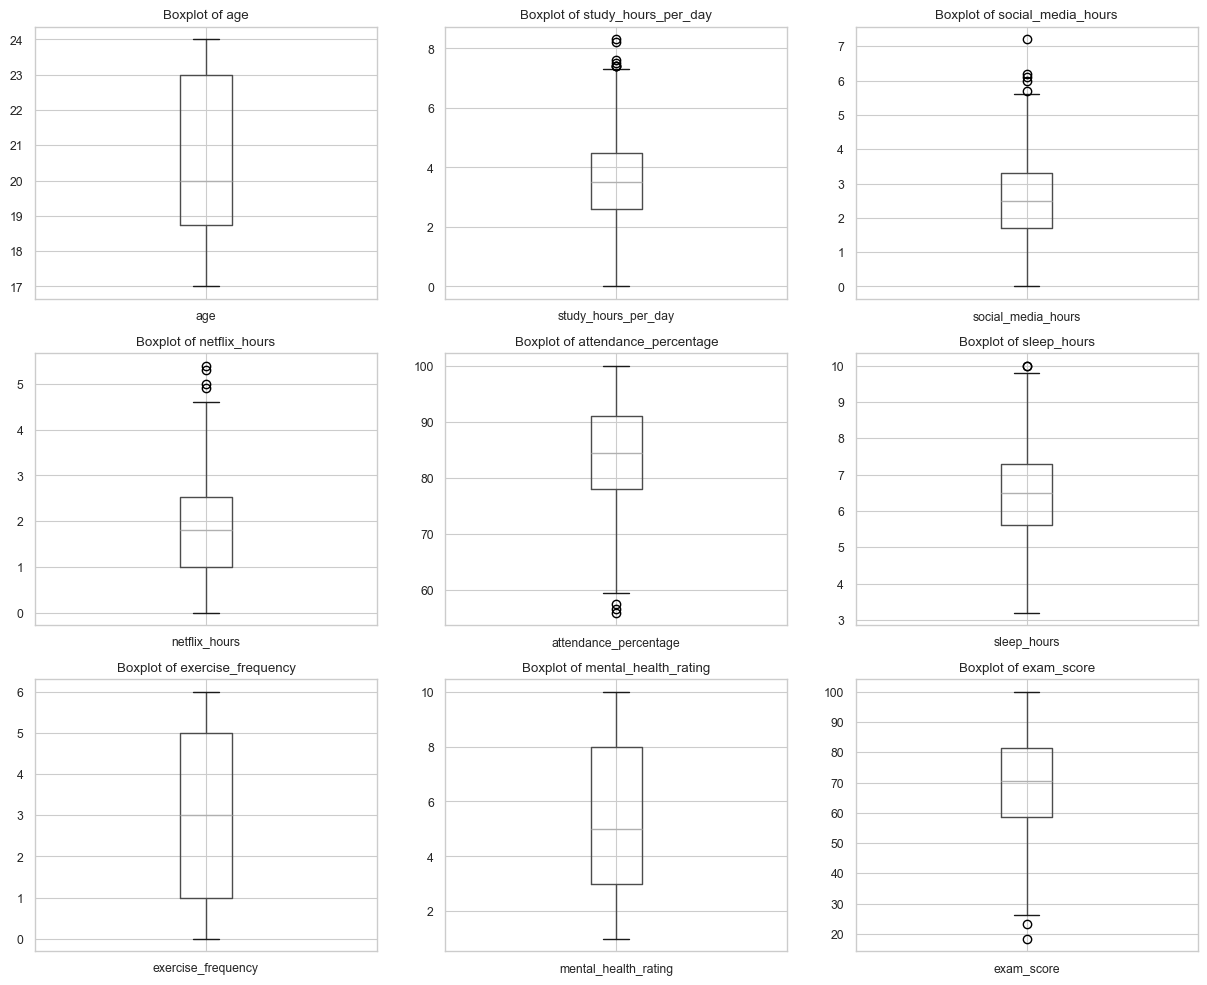

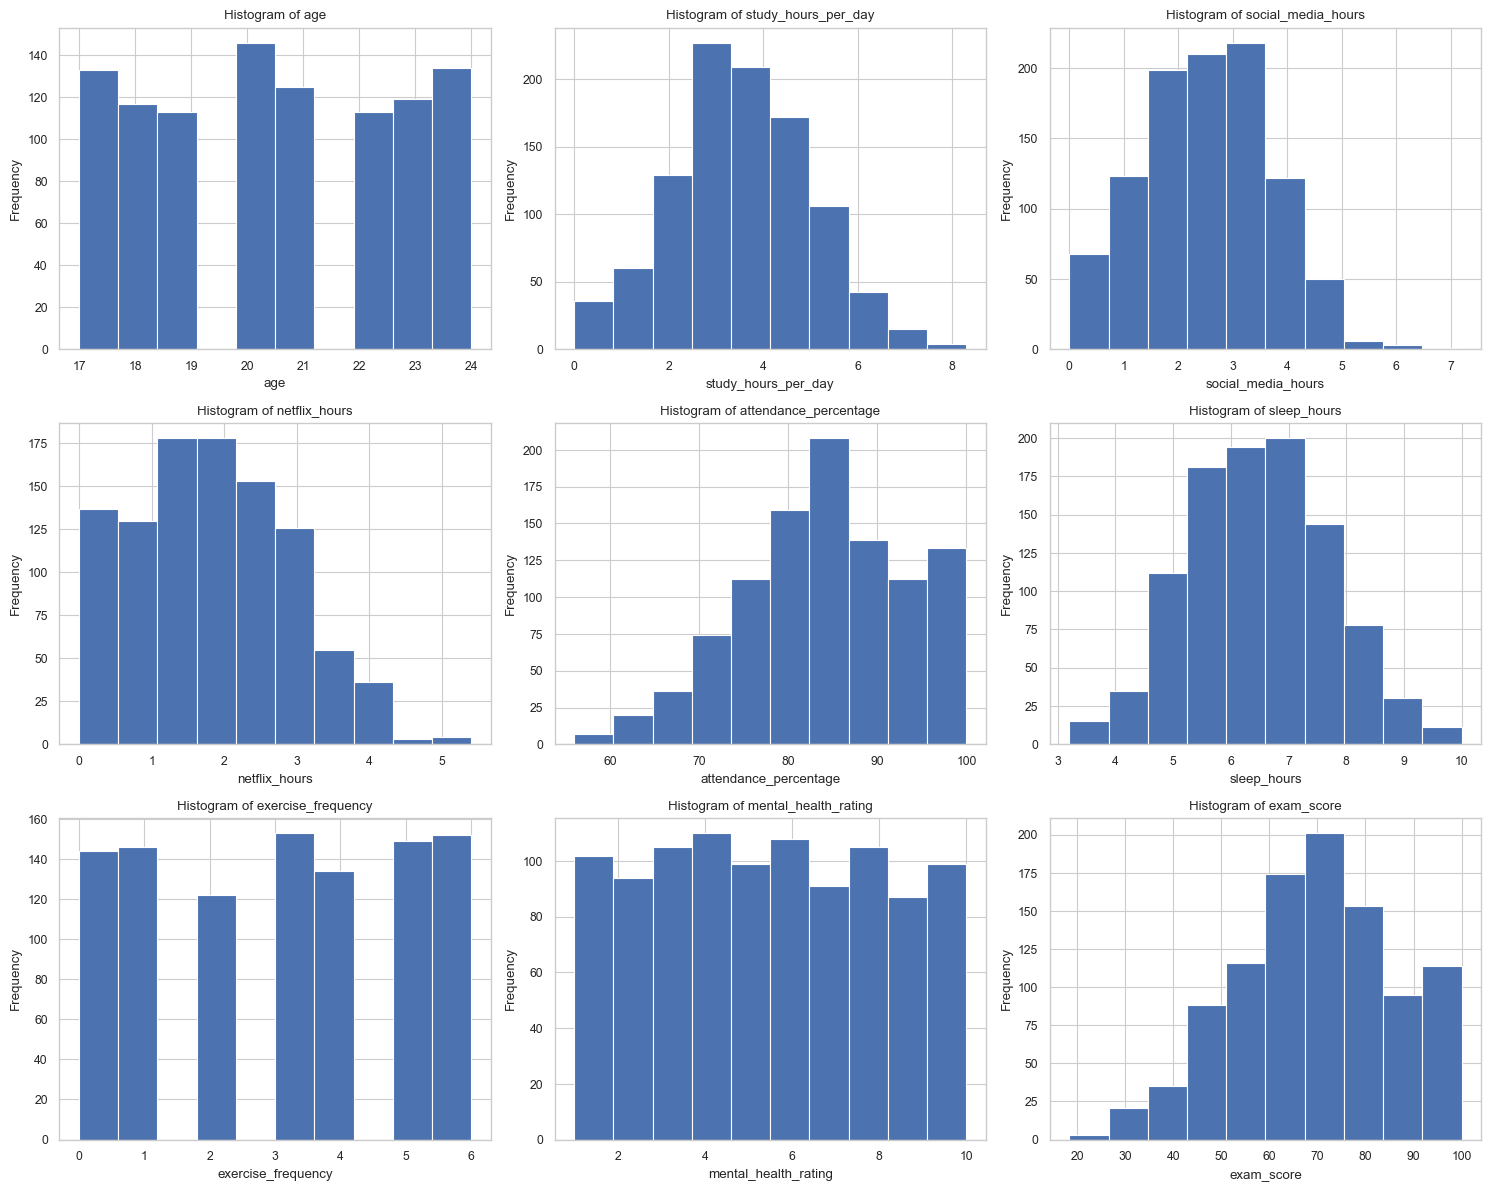

In [52]:
n_cols = 3
n_total = len(df_nums.columns)
n_rows = math.ceil(n_total/n_cols)
# create boxplots for each numeric column
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_nums.columns):
    df_nums.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    
plt.show()


# create histograms for each numeric column
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(df_nums.columns):
    df_nums.hist(column=col, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

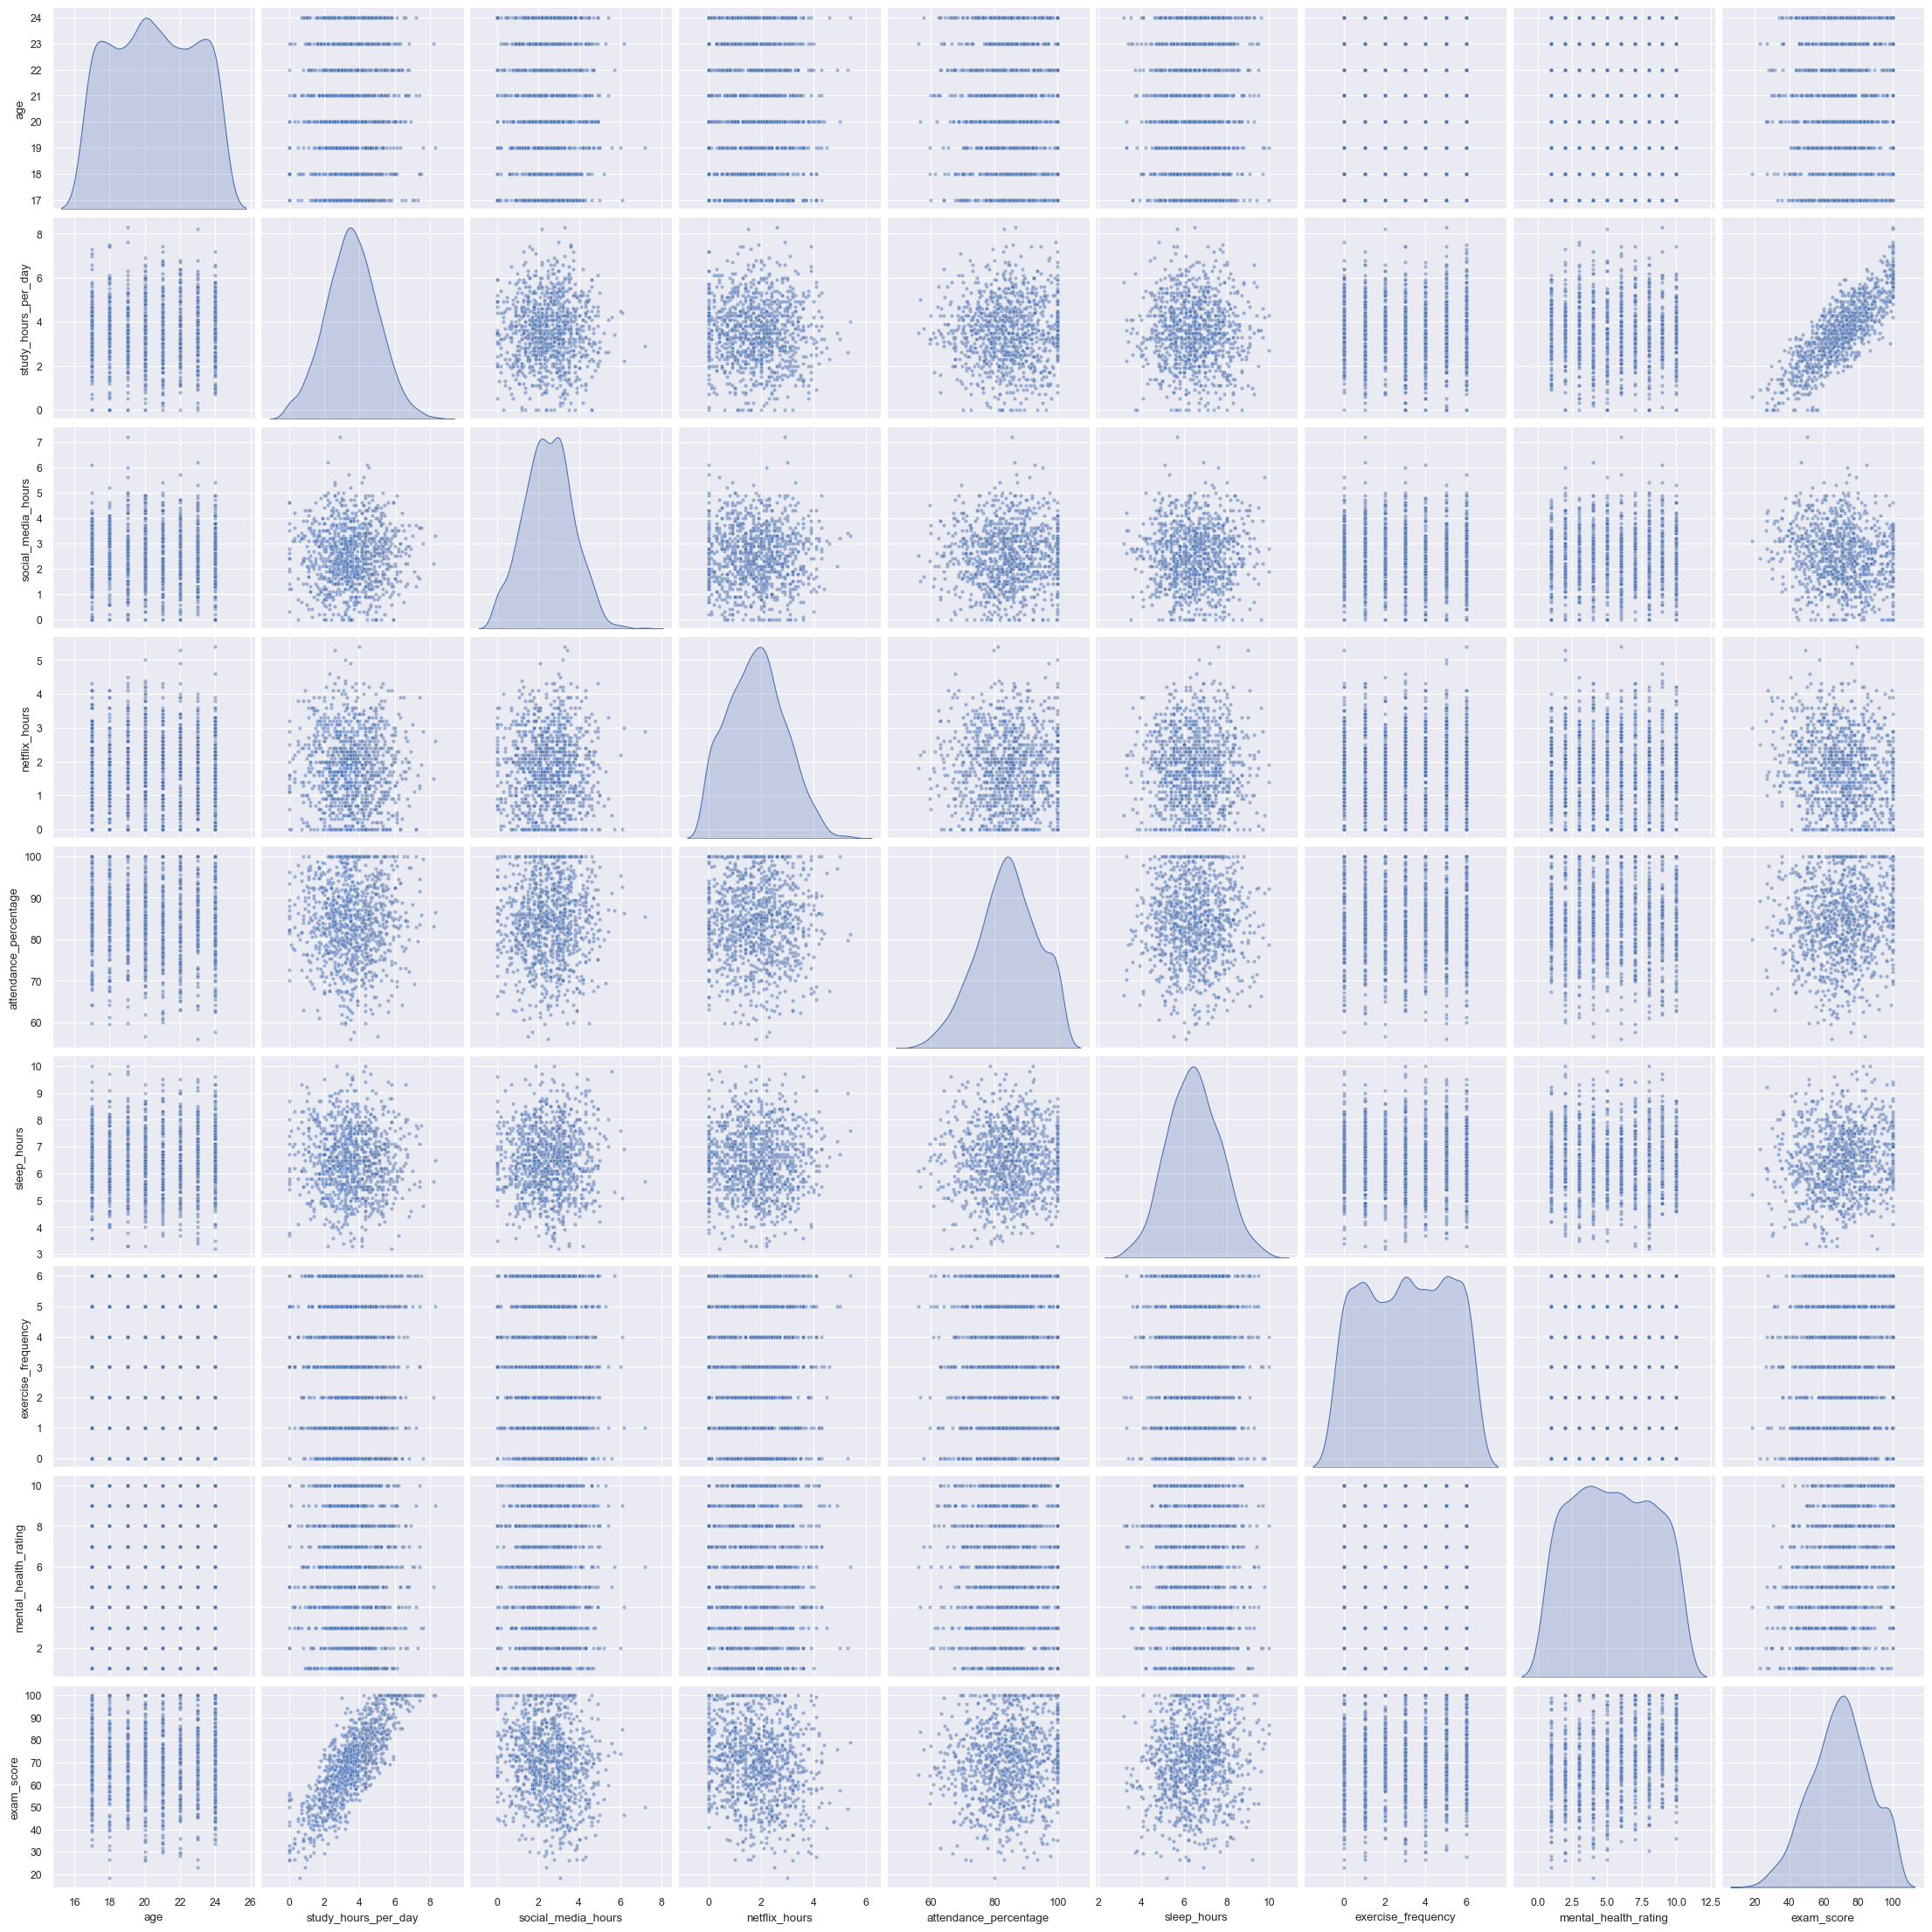

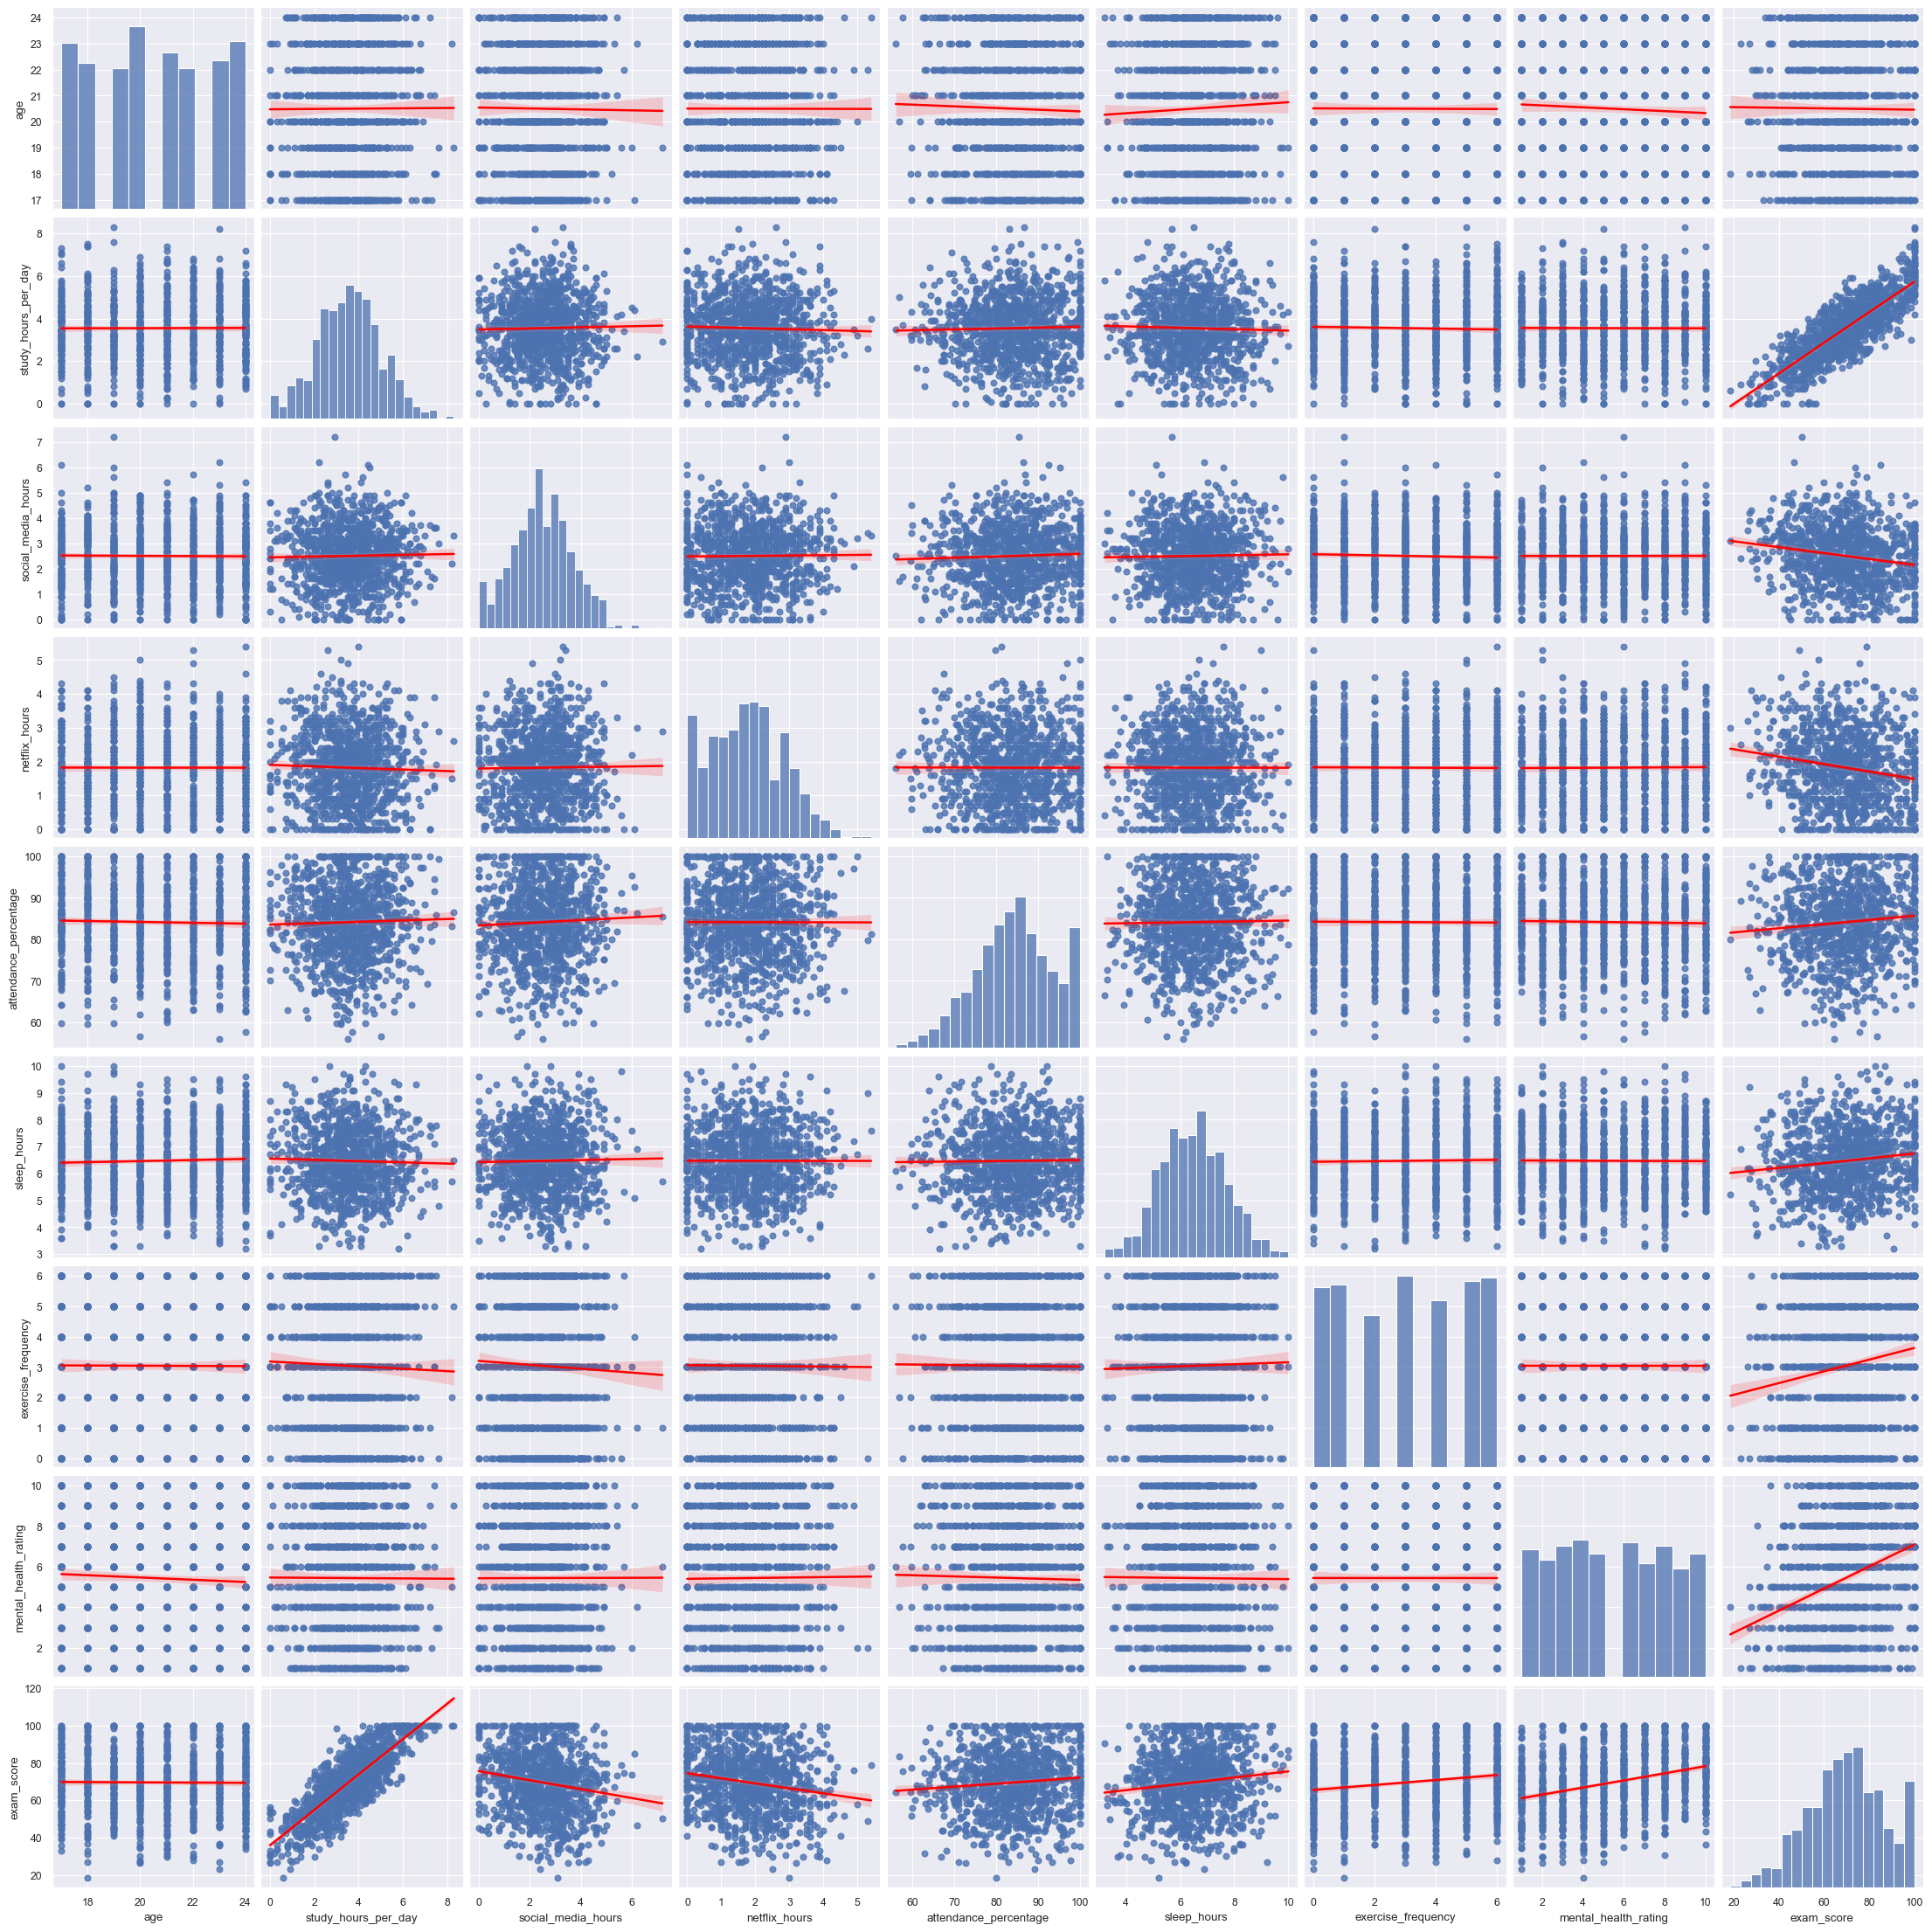

In [ ]:
# create pairplot for numeric columns
sns.pairplot(df_nums, diag_kind='kde', plot_kws={'alpha':0.5, 's':10})
plt.show()

sns.pairplot(df_nums, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

### Strongest Correlations for Numerical Features

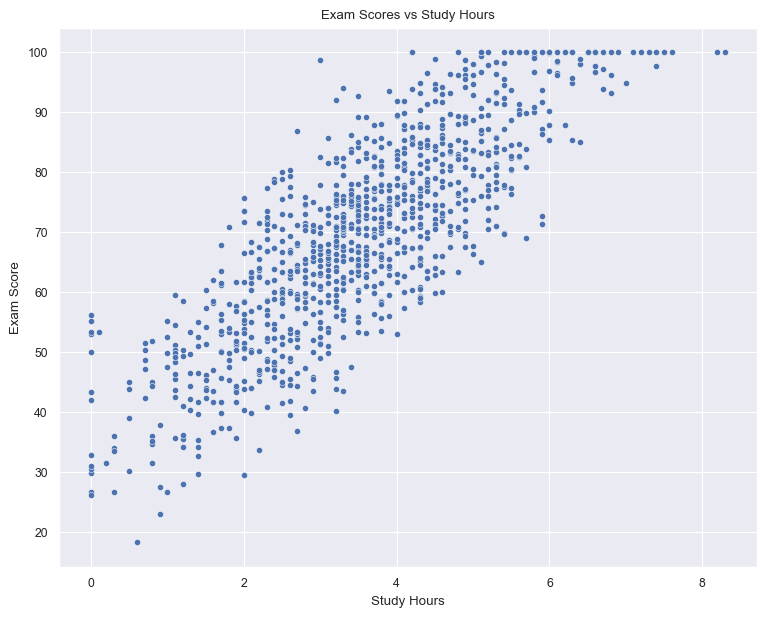

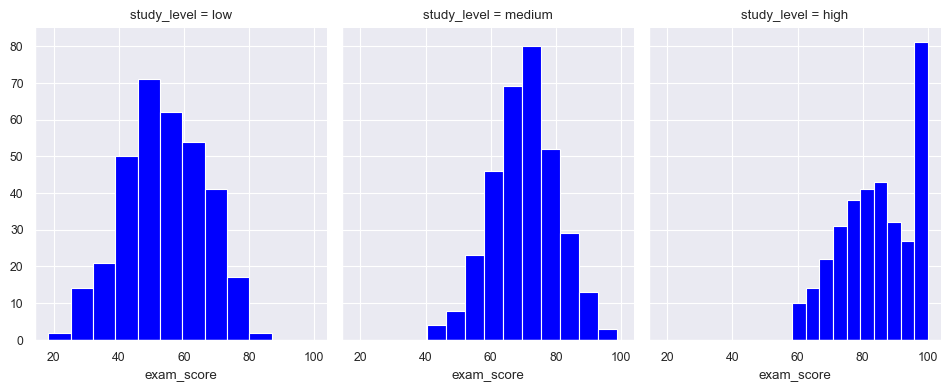

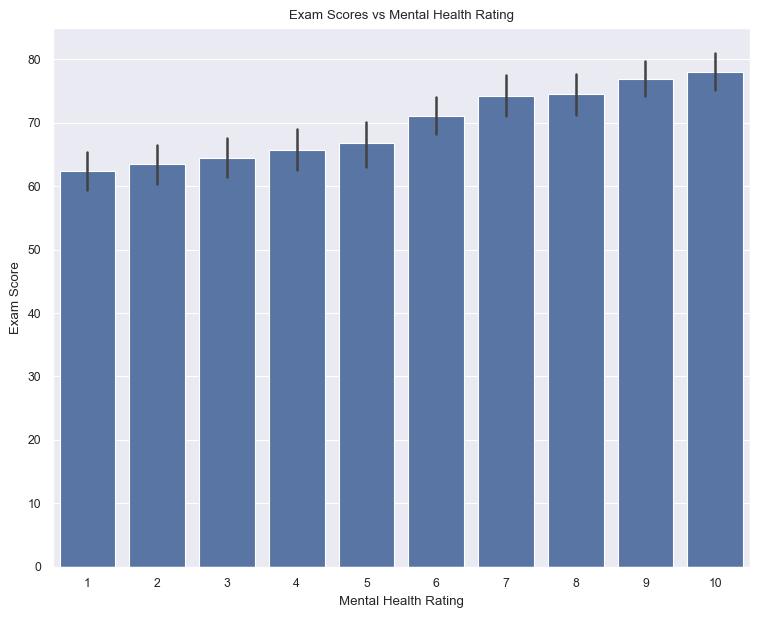

In [6]:
# study_hours_per_day shows a strong correlation with scores.
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, s=20)
plt.title('Exam Scores vs Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()

# If we were to break study hours into levels, how might the scoring be distributed?
quantiles = df['study_hours_per_day'].quantile([0,0.33,0.66,1])
df['study_level']=pd.cut(df['study_hours_per_day'], 	include_lowest=True, bins=quantiles, labels=['low', 'medium', 'high'])

# check the distribution of exam scores by study level
g=sns.FacetGrid(df, col='study_level', height=4, aspect=0.8)
g.map(plt.hist, 'exam_score', color='blue')
plt.show()

# mental_health_rating is numeric but discrete categories. also indicates a strong correlation with scores.
sns.barplot(x='mental_health_rating', y='exam_score', data=df)
plt.title('Exam Scores vs Mental Health Rating')
plt.xlabel('Mental Health Rating')
plt.ylabel('Exam Score')
plt.show()



### Negative Correlations with Numerical Features

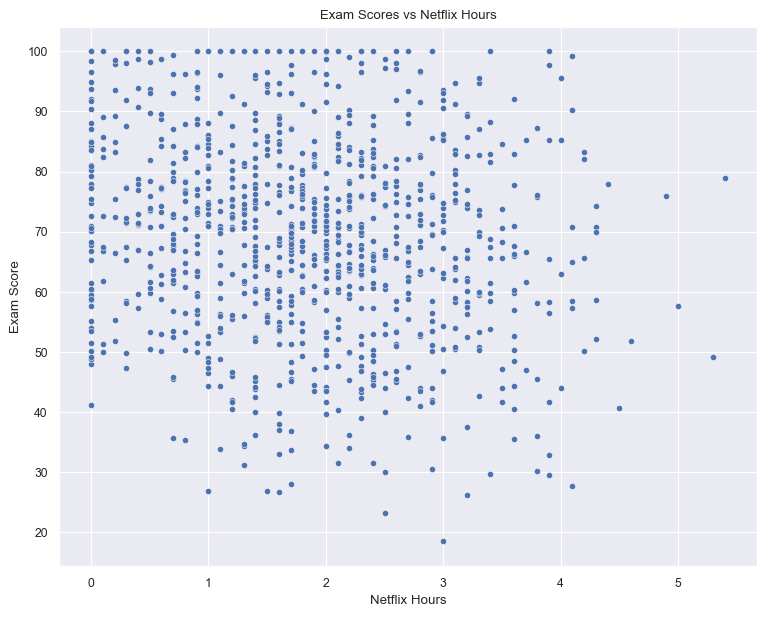

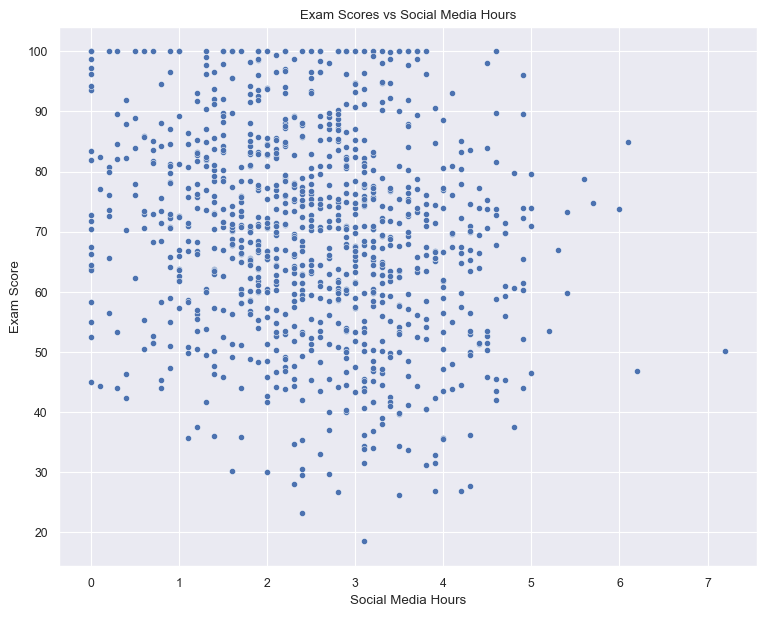

In [7]:
# slight negative correlation between netflix_hours and exam_scores.
sns.scatterplot(x='netflix_hours', y='exam_score', data=df, s=20)
plt.title('Exam Scores vs Netflix Hours')
plt.xlabel('Netflix Hours')
plt.ylabel('Exam Score')
plt.show()


# slight negative correlation betweeen social_media_hours and exam_scores.
sns.scatterplot(x='social_media_hours', y='exam_score', data=df, s=20)
plt.title('Exam Scores vs Social Media Hours')
plt.xlabel('Social Media Hours')
plt.ylabel('Exam Score')
plt.show()

## Understanding the Categorical Data

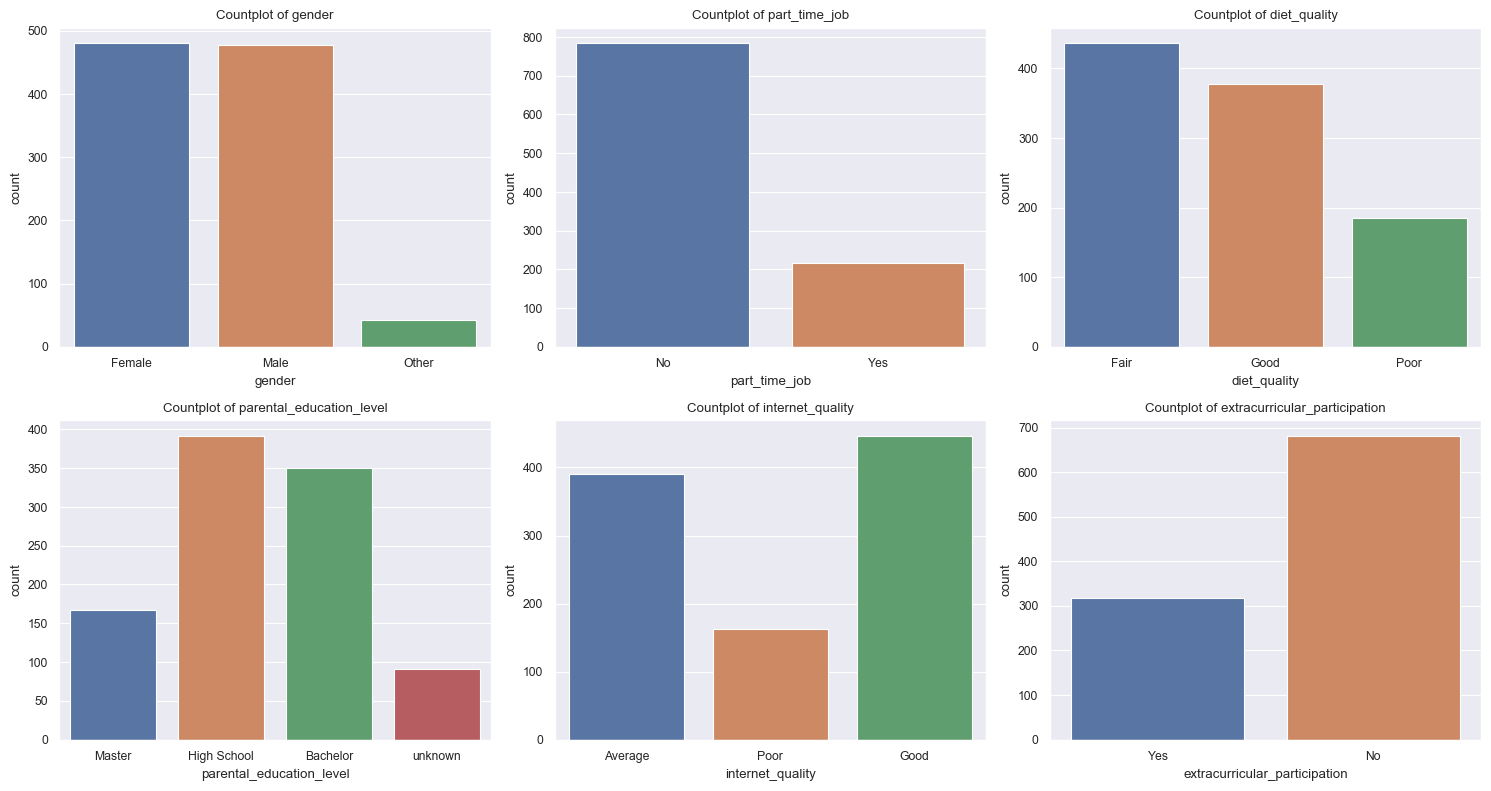

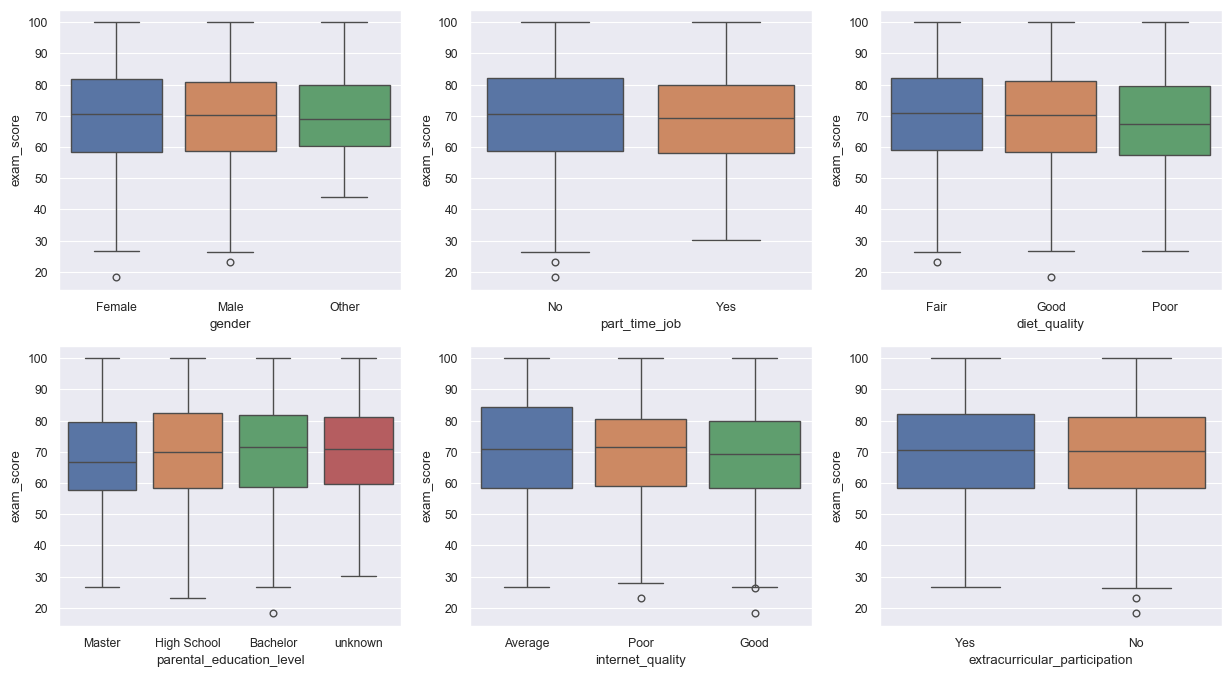

In [8]:

# Cateogrical Column Analysis
n_cols = 3
n_total = len(df_cats.columns)
n_rows = math.ceil(n_total/n_cols)

# create countplots for each categorical feature
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_cats.columns):
    sns.countplot(data=df_cats, x=col, hue=col, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=0)

for ax in axes[n_total:]:
    ax.set_visible(False)  # Hide any unused subplots

plt.tight_layout()
plt.show()

# Boxplots for categorical columns against exam scores to help visualize the relationship bewteen categorical variables and exam scores.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_cats.columns):
    sns.boxplot(data=df, x=col, y='exam_score', hue=col, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=0)

## Discovering Numerical/Categorical Relationships

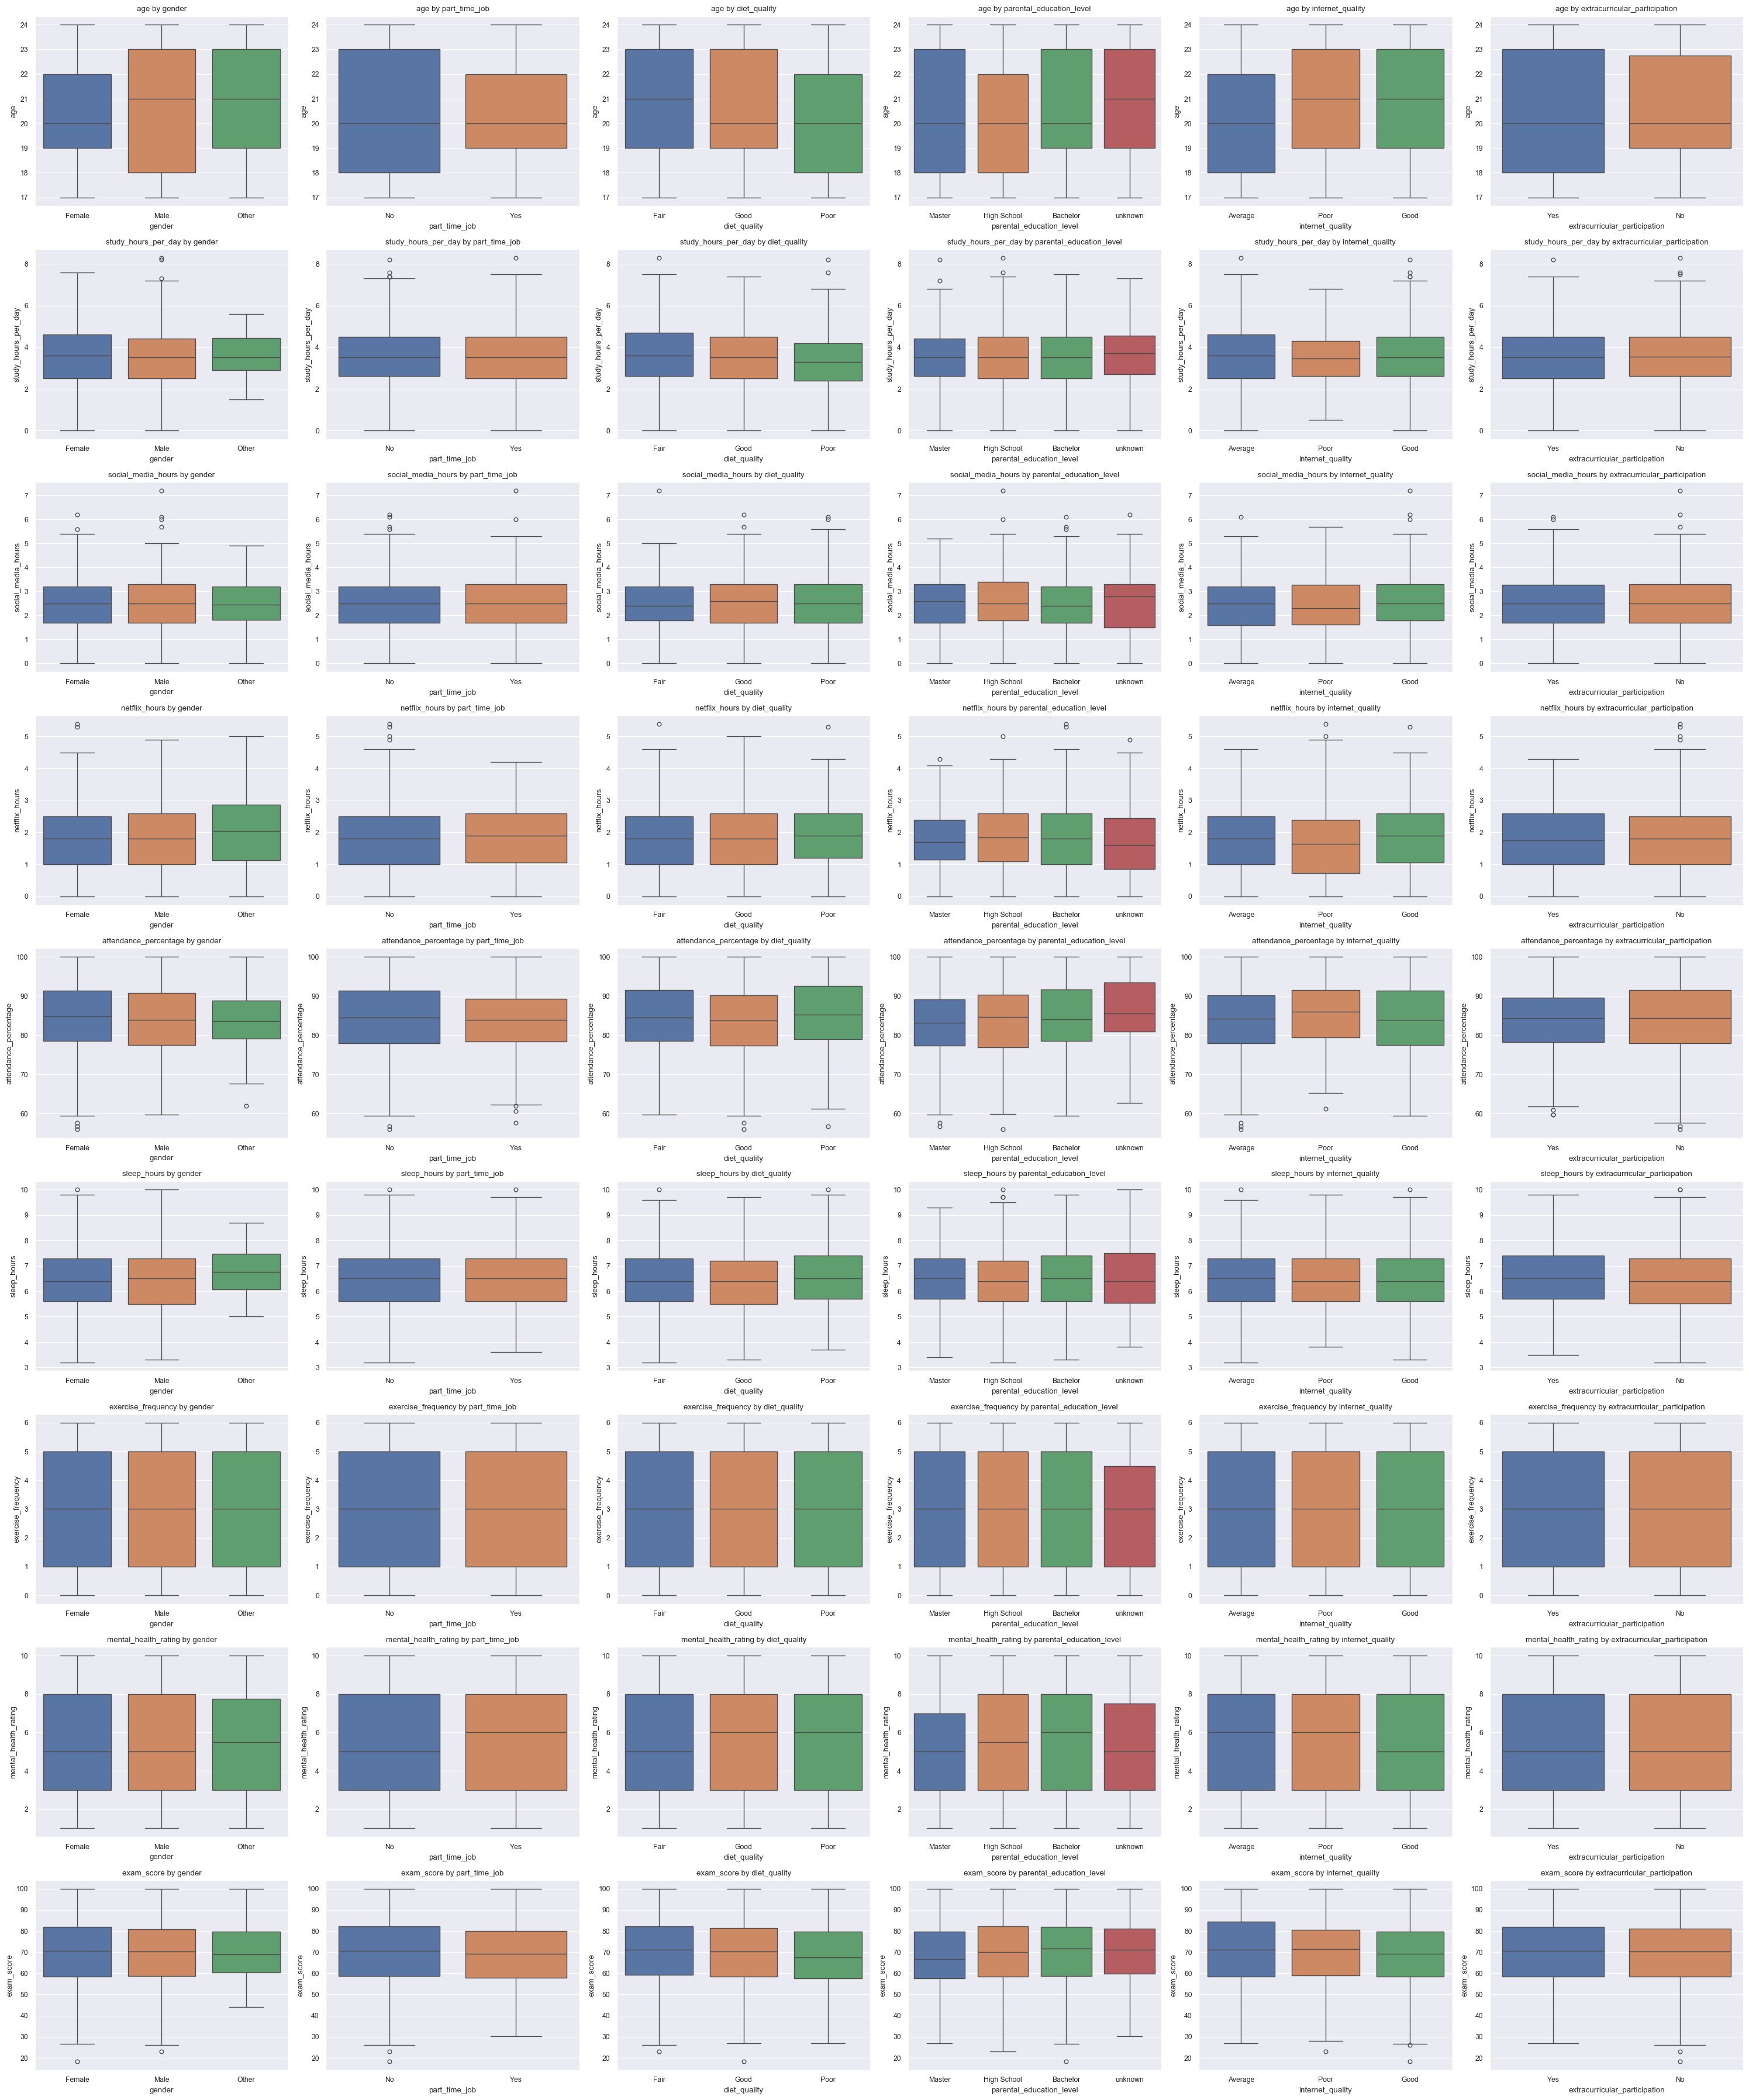

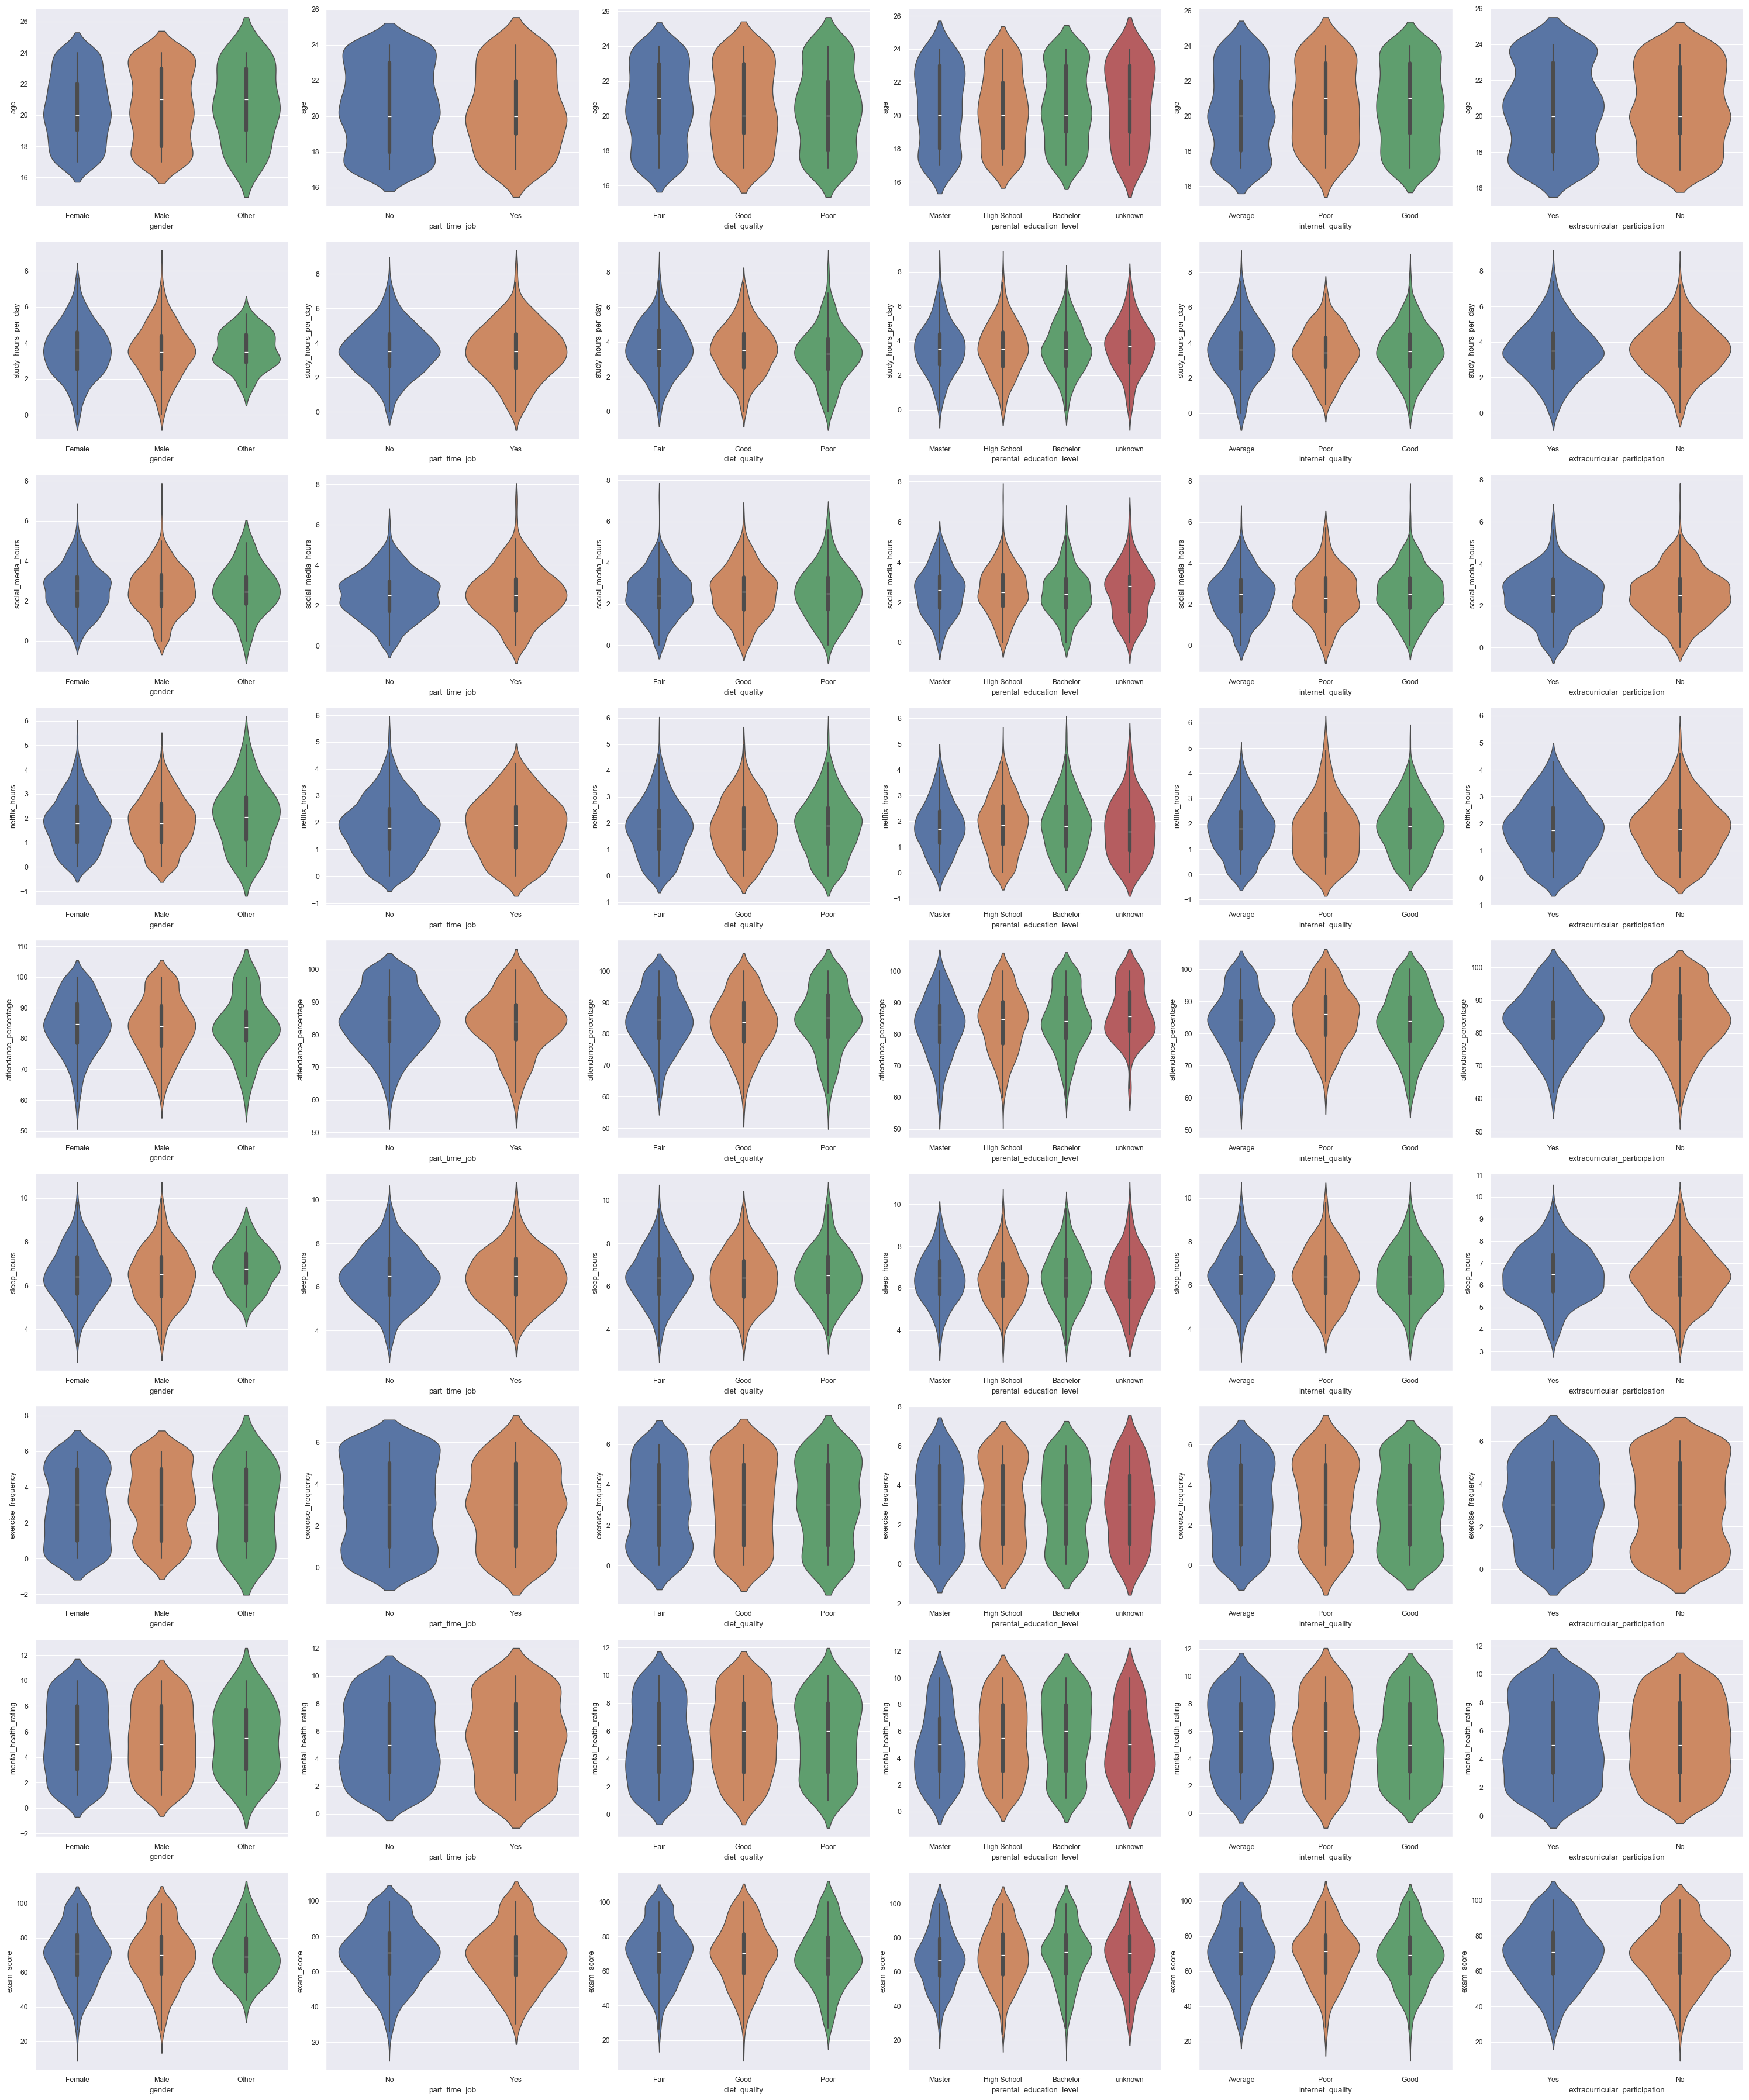

In [9]:

num_cols = df_nums.columns
cat_cols = df_cats.columns

fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5*len(cat_cols), 4*len(num_cols)))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        ax = axes[i, j]
        sns.boxplot(x=df[cat], y=df[num], hue=df[cat], ax=ax, legend=False)
        ax.set_title(f"{num} by {cat}")
        ax.set_xlabel(cat)
        ax.set_ylabel(num)
        

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5*len(cat_cols), 4*len(num_cols)))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        sns.violinplot(x=df[cat], y=df[num], hue=df[cat], ax=axes[i, j], legend=False)
        
        
        
plt.tight_layout()
plt.show()

## Correlation Analysis

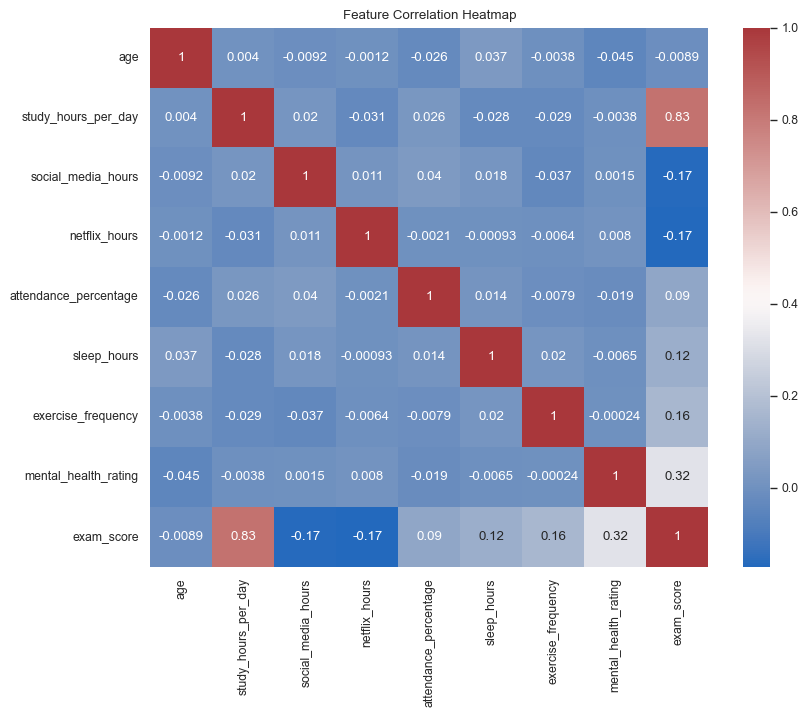

In [10]:
corr = df[num_cols].corr()
corr['exam_score'].sort_values(ascending=False)
plt.figure()
sns.heatmap(corr, cmap="vlag", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

#### The heatmap above shows the pairwise correlation coefficients between all numeric features in the dataset. This helps us identify which variables are most strongly associated with the target variable, 'exam_score'. 
    
- 'study_hours_per_day' has the strongest positive correlation with exam_score (r = 0.83), indicating that students who study more tend to perform better.
- 'mental_health_rating' also has a moderate positive correlation (r = 0.32), suggesting better mental health is associated with higher scores.
- 'exercise_frequency' and 'sleep_hours' have small positive correlations with exam_score, which may indicate mild benefits.
- On the other hand, 'social_media_hours' and 'netflix_hours' both have negative correlations (r = -0.17), implying that increased time on these distractions may negatively impact exam performance.

##### This analysis is useful for feature selection and provides insight into which student habits most directly influence academic outcomes.


## Regression Plots on Positive correlations 

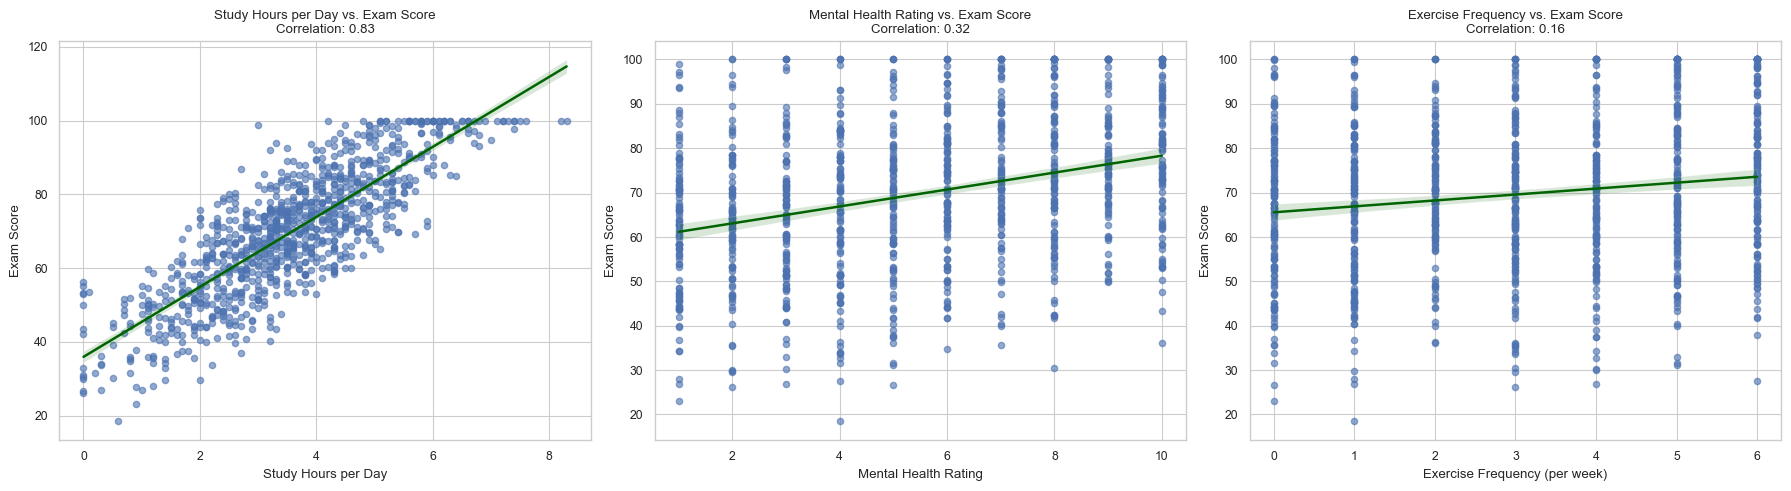

In [86]:
# Regression plots: Study Hours, Mental Health, and Exercise Frequency vs. Exam Score (Subplots)
sns.set_style("whitegrid")
fig = plt.figure(figsize=(18, 5))

# Regression plot: Study Hours vs. Exam Score
ax1 = fig.add_subplot(1, 3, 1)
sns.regplot(x='study_hours_per_day', y='exam_score', data=df, scatter_kws={'s':20, 'alpha':0.6}, line_kws={'color':'darkgreen'}, ax=ax1)
ax1.set_title("Study Hours per Day vs. Exam Score\nCorrelation: {:.2f}".format(corr.loc['study_hours_per_day','exam_score']))
ax1.set_xlabel("Study Hours per Day")
ax1.set_ylabel("Exam Score")

# Regression plot: Mental Health Rating vs. Exam Score
ax2 = fig.add_subplot(1, 3, 2)
sns.regplot(x='mental_health_rating', y='exam_score', data=df, scatter_kws={'s':20, 'alpha':0.6}, line_kws={'color':'darkgreen'}, ax=ax2)
ax2.set_title("Mental Health Rating vs. Exam Score\nCorrelation: {:.2f}".format(corr.loc['mental_health_rating','exam_score']))
ax2.set_xlabel("Mental Health Rating")
ax2.set_ylabel("Exam Score")

# Regression plot: Exercise Frequency vs. Exam Score
ax3 = fig.add_subplot(1, 3, 3)
sns.regplot(x='exercise_frequency', y='exam_score', data=df, scatter_kws={'s':20, 'alpha':0.6}, line_kws={'color':'darkgreen'}, ax=ax3)
ax3.set_title("Exercise Frequency vs. Exam Score\nCorrelation: {:.2f}".format(corr.loc['exercise_frequency','exam_score']))
ax3.set_xlabel("Exercise Frequency (per week)")
ax3.set_ylabel("Exam Score")

plt.tight_layout()
plt.show()

#### The regression plots above display the relationship between these positively correlated student habits and exam performance. 
    
- Study Hours per Day shows the strongest correlation (0.83). 
- Mental Health Rating has a moderate correlation (0.32). 
- Exercise Frequency has a weak but positive correlation (0.16). 

##### Plotting each variable individually makes it easier to visually interpret how each habit relates to exam performance. It helps support the initial findings from the correlation matrix. 

## Regression Plots on Negative Correlations 

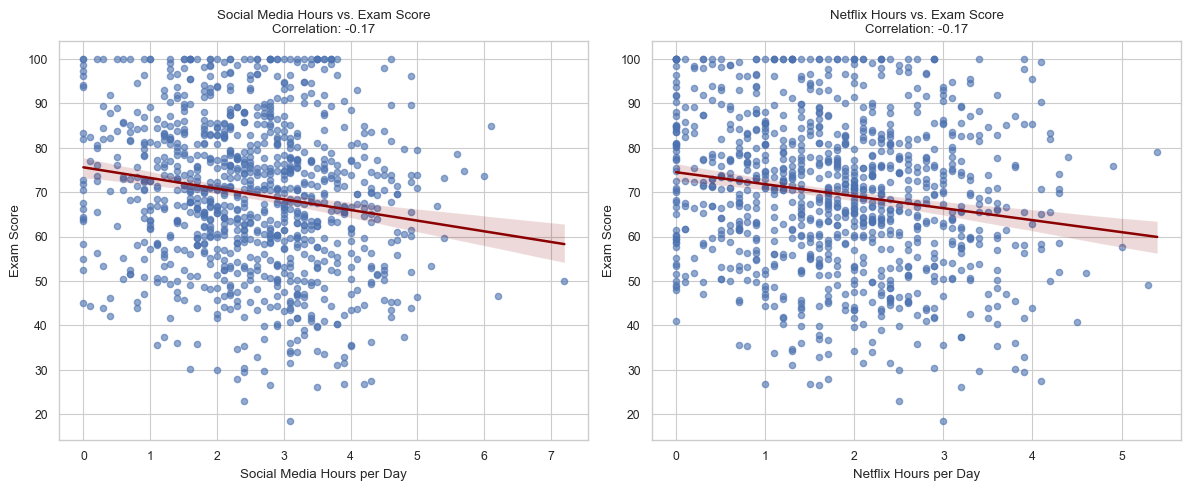

In [94]:
# Regression plots: Social Media and Netflix Hours vs. Exam Score (Subplots)
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12, 5))

# Regression plot: Social Media Hours vs. Exam Score
ax1 = fig.add_subplot(1, 2, 1)
sns.regplot(x='social_media_hours', y='exam_score', data=df, scatter_kws={'s':20, 'alpha':0.6}, line_kws={'color':'darkred'}, ax=ax1)
ax1.set_title("Social Media Hours vs. Exam Score\nCorrelation: {:.2f}".format(corr.loc['social_media_hours','exam_score']))
ax1.set_xlabel("Social Media Hours per Day")
ax1.set_ylabel("Exam Score")

# Regression plot: Netflix Hours vs. Exam Score
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='netflix_hours', y='exam_score', data=df, scatter_kws={'s':20, 'alpha':0.6}, line_kws={'color':'darkred'}, ax=ax2)
ax2.set_title("Netflix Hours vs. Exam Score\nCorrelation: {:.2f}".format(corr.loc['netflix_hours','exam_score']))
ax2.set_xlabel("Netflix Hours per Day")
ax2.set_ylabel("Exam Score")

plt.tight_layout()
plt.show()

#### These regression plots highlight two features that show negative correlation with exam performance. 
    
 - Social Media Hours per Day and Netflix Hours per Day, both have a correlation of -0.17.
 - For example: even students who watch 3-4 hours of Netflix may still score highly, but on average scores trend downward. 
    
##### While the strength  of these correlations is relatively weak, the negative direction suggests that more time spent on distractions is associated with lower exam scores.
    
##### Visualizing these features individually allows us to see the downward trend lines and the spread of data more clearly. It is especially helpful for interpreting subtle patterns that might be lost in a heatmap. 

## Group Comparisons

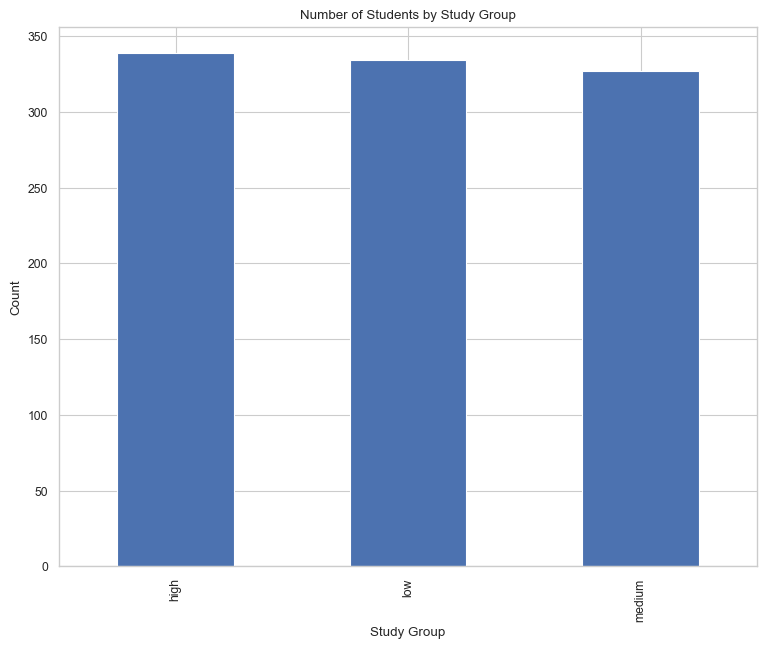

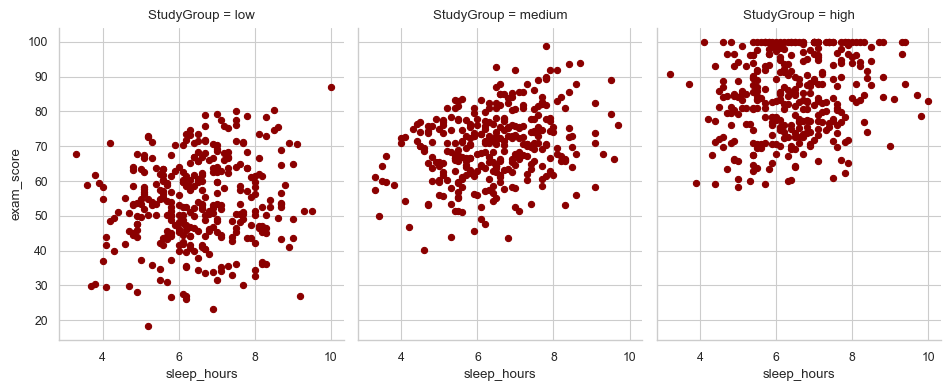

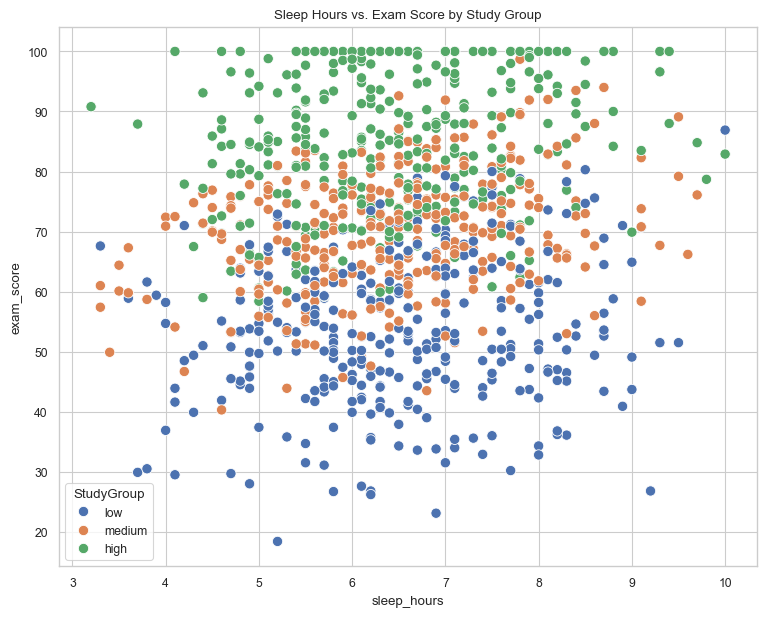

In [96]:
breaks = df['study_hours_per_day'].quantile([0, 0.33, 0.66, 1.0])
df['StudyGroup'] = pd.cut(df['study_hours_per_day'], include_lowest=True, bins=breaks, labels=['low', 'medium', 'high'])

#Bar chart of counts by StudyGroup
sns.set_style("whitegrid")
df['StudyGroup'].value_counts().plot.bar()
plt.title("Number of Students by Study Group")
plt.xlabel("Study Group")
plt.ylabel("Count")
plt.show()

#Faceted scatter: sleep_hours vs. exam_score by StudyGroup
sns.set_style("whitegrid")
g = sns.FacetGrid(df, col='StudyGroup', col_order=['low', 'medium', 'high'], height=4, aspect=0.8)
g.map(plt.scatter, 'sleep_hours', 'exam_score', s=20, color='darkred')
plt.show()

#Scatterplot with hue by StudyGroup
sns.set_style("whitegrid")
sns.scatterplot(x='sleep_hours',y='exam_score',data=df, hue='StudyGroup', s=55)
plt.title("Sleep Hours vs. Exam Score by Study Group")
plt.show()


#### To explore how study habits affect academic performance, we first created three groups of students based on their daily study hours using quantiles:

- Low: bottom 33% of students in terms of study hours
- Medium: middle 33%
- High: top 33%

##### 1. Bar Chart: number of students is relatively evenly distributed across the three groups. 
    
##### 2. Scatter Plots: These display sleep_hours vs exam_score for each study group side-by-side.
    
- Students in the high study group tend to score higher overall, even when sleep hours vary. 
- Students in the low group show wider variation and generally lower scores.
    
##### 3. Combined Scatter Plot with Hue: overlays all groups together with different colors, making it easy to compare across groups:

- Green dots (high study) are clustered toward higher exam scores, regardless of sleep.
- Blue dots (low study) appear more frequently in the lower score range.
- Sleep hours appear to contribute positively, but study group membership is a stronger factor.




## kNN Regression 

In [15]:
features = ['study_hours_per_day', 'mental_health_rating', 'exercise_frequency' ]

X = df[features].values
y = df['exam_score'].values

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


for k in [3,5,7]:
    regr = KNeighborsRegressor(n_neighbors=k)
    regr.fit(X_train, y_train)
    preds = regr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"k={k} RMSE: {rmse:.2f}")

#Blind MSE using y_train
blind_pred = y_train.mean()
mse_blind = mean_squared_error(y_test, [blind_pred]*len(y_test))
print(f'Blind MSE:  {mse_blind:.0f}')
rmse_blind = np.sqrt(mse_blind)
print("Blind RMSE: {:.2f}".format(rmse_blind))

regr = KNeighborsRegressor(n_neighbors=7)
regr.fit(X_train, y_train)

#predictions 
predictions = regr.predict(X_test)

k=3 RMSE: 8.29
k=5 RMSE: 7.68
k=7 RMSE: 7.37
Blind MSE:  279
Blind RMSE: 16.69


#### In this section, we used a kNN regression model to predict students’ exam scores based on the following three features:
- study_hours_per_day
- mental_health_rating
- exercise_frequency

We tested three different values of k (3, 5, and 7) and evaluated model performance using Root Mean Squared Error (RMSE). The lowest RMSE was achieved with k=7, making it the best-performing kNN configuration in this experiment.

We also calculated a blind baseline RMSE using the mean of y_train as the prediction for all test samples. Which is significantly worse than the kNN models, showing that a simple kNN regressor can outperform a naïve guess. 

##### These results suggest that student habits such as studying, exercising, and mental health ratings do contain predictive value for estimating exam scores. The relatively low RMSE for k=7 implies a decent fit, especially compared to the blind baseline.

## Anomaly Detection (Positive Features)

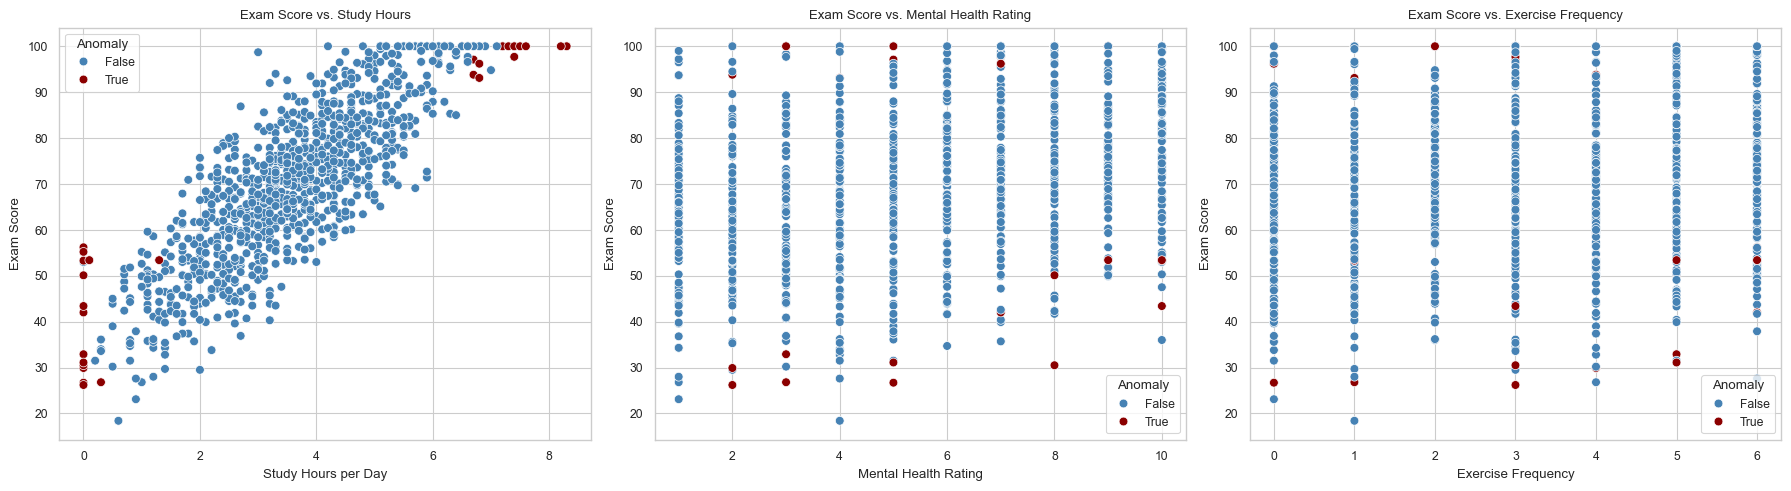

In [104]:
def edist(x, y):
    return np.sqrt(np.sum((x-y)**2))

def dist(x):
    m = x.shape[0]
    dm = np.zeros((m, m))
    for i in range(m):
        for j in range(i, m):
            dm[i, j] = edist(x[i], x[j])
            dm[j, i] = dm[i, j]
    return dm

def knn_anomalies(df, k=7, threshold=2.5):
    # scale the data and compute distance matrix
    x = df.apply(zscore).values
    dm = dist(x)
    
    m = x.shape[0]
    k_distances = np.zeros(m)
    
    for i in range(m):
        row = dm[i, :]
        row_sorted = np.sort(row)
        k_distances[i] = row_sorted[k]
    
    kd_zscores = zscore(k_distances)
    
    anomaly_idxs = np.where(kd_zscores > threshold)[0]
    return anomaly_idxs

anoms = knn_anomalies(df[features], k=7, threshold=2.5)

#Add a new 'Anomaly' column to the main df
x = np.full(len(df), False)
x[anoms] = True
df['Anomaly'] = x

df_anom = df[features].copy()
df_anom['Anomaly'] = df['Anomaly']

sns.set_style("whitegrid")
fig = plt.figure(figsize=(18, 5))

# Scatter: Study Hours vs. Exam Score
ax1 = fig.add_subplot(1, 3, 1)
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, hue='Anomaly', palette={False: 'steelblue', True: 'darkred'}, s=40, ax=ax1)
ax1.set_title("Exam Score vs. Study Hours")
ax1.set_xlabel("Study Hours per Day")
ax1.set_ylabel("Exam Score")
ax1.legend(title='Anomaly', loc='best')

# Scatter: Mental Health vs. Exam Score
ax2 = fig.add_subplot(1, 3, 2)
sns.scatterplot(x='mental_health_rating', y='exam_score', data=df, hue='Anomaly', palette={False: 'steelblue', True: 'darkred'}, s=40, ax=ax2)
ax2.set_title("Exam Score vs. Mental Health Rating")
ax2.set_xlabel("Mental Health Rating")
ax2.set_ylabel("Exam Score")
ax2.legend(title='Anomaly', loc='best')

# Scatter: Exercise Frequency vs. Exam Score
ax3 = fig.add_subplot(1, 3, 3)
sns.scatterplot(x='exercise_frequency', y='exam_score', data=df, hue='Anomaly', palette={False: 'steelblue', True: 'darkred'}, s=40, ax=ax3)
ax3.set_title("Exam Score vs. Exercise Frequency")
ax3.set_xlabel("Exercise Frequency")
ax3.set_ylabel("Exam Score")
ax3.legend(title='Anomaly', loc='best')

plt.tight_layout()
plt.show()

#### In this section, we applied unsupervised anomaly detection using a k-Nearest Neighbors (kNN) distance-based approach. The goal was to identify students whose behavior patterns differ significantly from their peers based on:
- study_hours_per_day
- mental_health_rating
- exercise_frequency
##### Key Observations: 
- In the Study Hours vs. Exam Score plot, many anomalies appear in the extremes, such as students who study very little but score high, or those who study a lot but score low.
- In the Mental Health and Exercise plots, anomalies are scattered more broadly but often correspond to unusual combinations, such as poor mental health with high scores or low exercise with extreme performance.
- These outliers may indicate atypical study strategies, lifestyle behaviors, or data entry inconsistencies worth investigating further.

## Anomaly Detection (Negative Features)

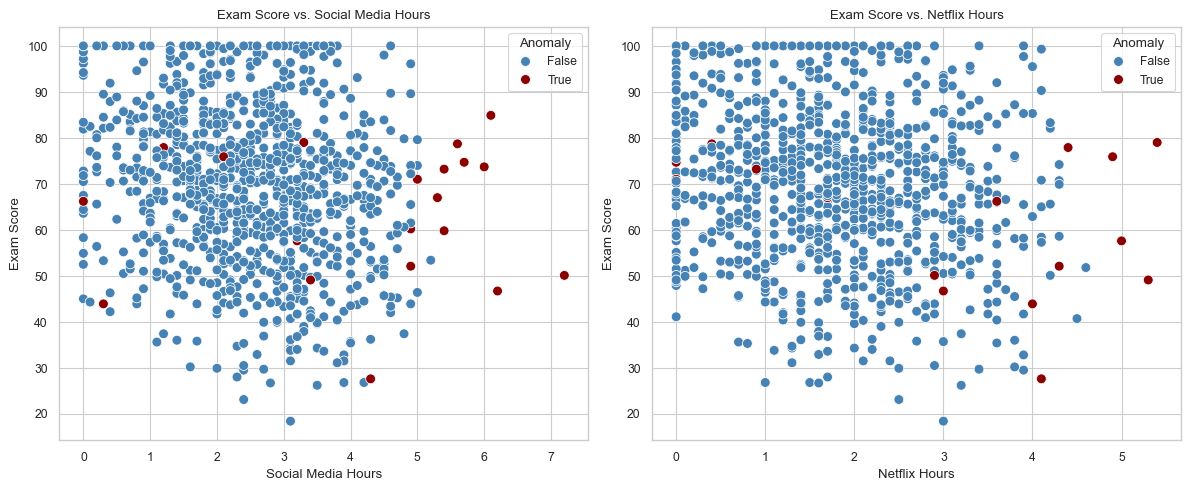

In [110]:
features_neg = ['social_media_hours', 'netflix_hours']
df_anom_neg = df[features_neg].copy()
df_scaled_neg = df_anom_neg.apply(zscore)

anoms_neg = knn_anomalies(df_scaled_neg, k=7, threshold=2.5)

# Mark anomalies in the main df
flags = np.full(len(df), False)
flags[anoms_neg] = True
df['Anomaly'] = flags
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12, 5))

# Scatter: Social Media Hours vs. Exam Score
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(x='social_media_hours', y='exam_score', data=df, hue='Anomaly', palette={False: 'steelblue', True: 'darkred'}, s=50, ax=ax1)
ax1.set_title("Exam Score vs. Social Media Hours")
ax1.set_xlabel("Social Media Hours")
ax1.set_ylabel("Exam Score")
ax1.legend(title='Anomaly', loc='best')

# Scatter: Netflix Hours vs. Exam Score
ax2 = fig.add_subplot(1, 2, 2)
sns.scatterplot(x='netflix_hours', y='exam_score', data=df, hue='Anomaly', palette={False: 'steelblue', True: 'darkred'}, s=50, ax=ax2)
ax2.set_title("Exam Score vs. Netflix Hours")
ax2.set_xlabel("Netflix Hours")
ax2.set_ylabel("Exam Score")
ax2.legend(title='Anomaly', loc='best')

plt.tight_layout()
plt.show()

#### The goal was to identify students whose behavior patterns differ significantly from their peers based on:
- Social Media Hours
- Netflix Hours

#### Left Plot (Social Media Hours):
- Most students cluster between 1–4 hours of daily social media use.
- Anomalies (red points) appear at the higher end (5–7+ hours), often paired with lower-than-average exam scores. A few red dots also appear at extreme low usage with unexpectedly high or low scores, suggesting unusual behavior profiles.

#### Right Plot (Netflix Hours):
- Anomalies are similarly found among students with high daily streaming time, particularly above 4 hours, yet maintain moderate scores between 70–80.



## Prediction vs. True Plot

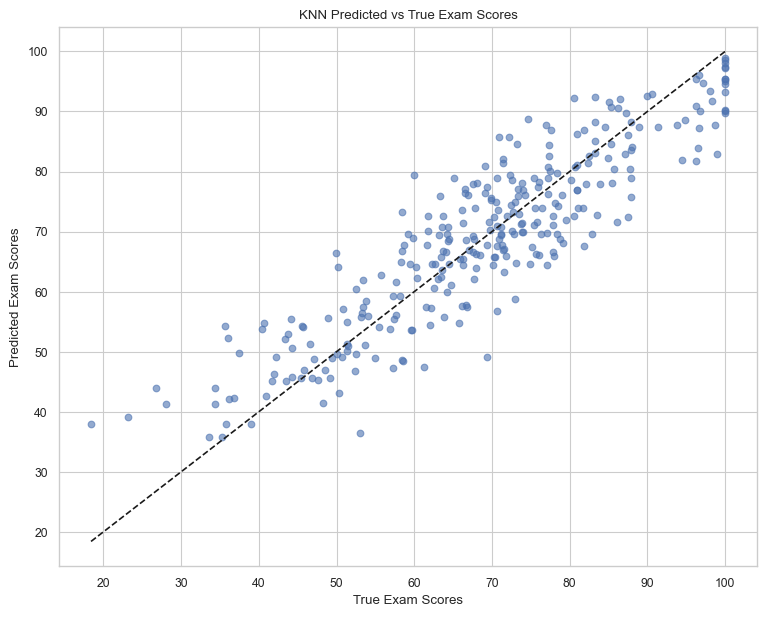

In [37]:
plt.figure()
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("True Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("KNN Predicted vs True Exam Scores")
plt.show()


#### This scatter plot compares the true exam scores (x-axis) with the predicted scores from the kNN regression model (y-axis).
- The dashed diagonal line represents perfect predictions, where predicted = actual.
- Most points cluster closely around this line, indicating good model performance.

Some scatter is visible, especially at the low and mid-range scores, but the overall trend shows a strong linear relationship. This plot visually confirms that the kNN model is capturing the general pattern in the data and making reasonably accurate predictions.

## Linear Regression


Box-Cox lambda for exam_score: 1.171


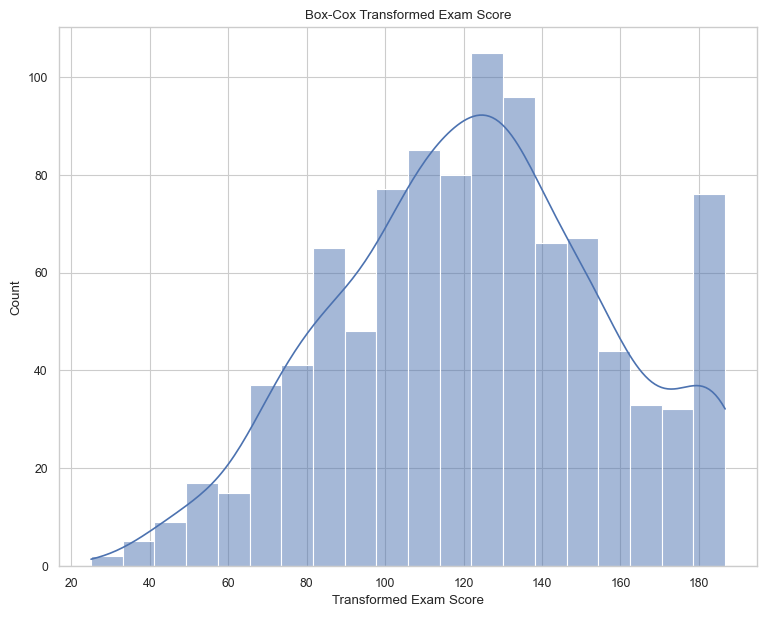

In [65]:
# Box-Cox Transformation for exam_score testing to see distribution
from scipy.stats import boxcox

# Add a small constant if there are zeros
exam_score_bc, fitted_lambda = boxcox(df['exam_score'] + 1e-6)
df['exam_score_boxcox'] = exam_score_bc

print(f"Box-Cox lambda for exam_score: {fitted_lambda:.3f}")

sns.histplot(df['exam_score_boxcox'], bins=20, kde=True)
plt.title("Box-Cox Transformed Exam Score")
plt.xlabel("Transformed Exam Score")
plt.show()

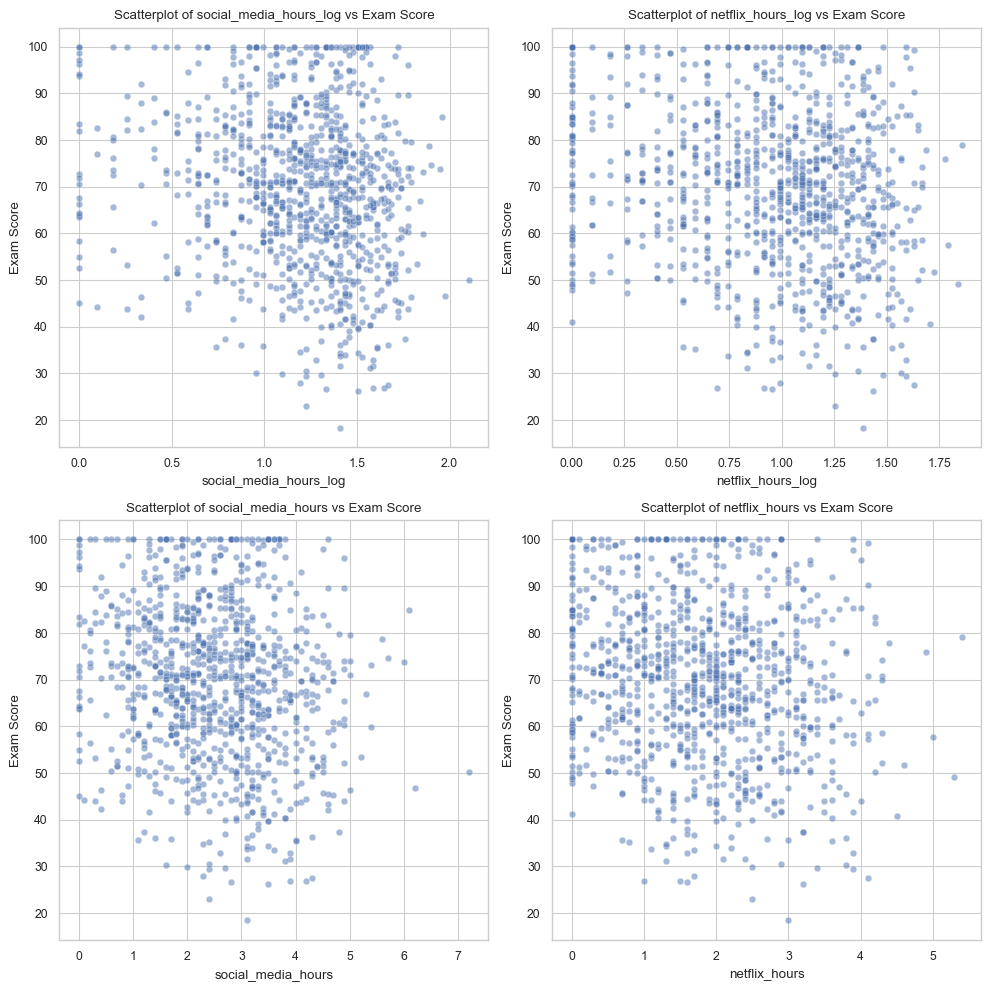

In [63]:
# Testing impact of log transforms to right-skewed data
df['social_media_hours_log'] = df['social_media_hours'].apply(lambda x: np.log(x + 1) if x > 0 else 0)
df['netflix_hours_log'] = df['netflix_hours'].apply(lambda x: np.log(x + 1) if x > 0 else 0)

cols_log = ['social_media_hours_log', 'netflix_hours_log', 'social_media_hours', 'netflix_hours']
df_nums_log = df[cols_log]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
for i, col in enumerate(cols_log):
    sns.scatterplot(x=df[col], y=df['exam_score'], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Scatterplot of {col} vs Exam Score')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Exam Score')
plt.tight_layout()
plt.show()


In [67]:
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import KFold

predictors = ['study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 
              'sleep_hours', 'netflix_hours', 'social_media_hours']  # example predictors
target = 'exam_score'

results = []

for k in range(1, len(predictors)+1):
    for combo in itertools.combinations(predictors, k):
        #
        X = df[list(combo)].values
        y = df[target].values
        sub_results = []
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Apply cross validation
        cv = KFold(n_splits=10, shuffle=True, random_state=42)
        for train_idx, test_idx in cv.split(X_train):
            X_cv_train, X_cv_test = X_train[train_idx], X_train[test_idx]
            y_cv_train, y_cv_test = y_train[train_idx], y_train[test_idx]
            model = LinearRegression()
            model.fit(X_cv_train, y_cv_train)
            y_cv_pred = model.predict(X_cv_test)
            cv_rmse = root_mean_squared_error(y_cv_test, y_cv_pred)
            cv_r2 = r2_score(y_cv_test, y_cv_pred)
            sub_results.append({
                'predictors': combo,
                'rmse': cv_rmse,
                'r2': cv_r2
            })
        results.append({
            'predictors': combo,
            'rmse-mean': np.mean([res['rmse'] for res in sub_results]),
            'r2-mean': np.mean([res['r2'] for res in sub_results])
        })
        # model = LinearRegression()
        # model.fit(X_train, y_train)
        # y_pred = model.predict(X_test)
        # rmse = mean_squared_error(y_test, y_pred, squared=False)
        # r2 = r2_score(y_test, y_pred)
        # results.append({
        #     'predictors': combo,
        #     'rmse': rmse,
        #     'r2': r2
        # })


results_sorted = sorted(results, key=lambda x: x['r2-mean'], reverse=True)
for res in results_sorted[:10]:  # Show top 10
    print(f"Predictors: {res['predictors']}, r2 avg: {res['r2-mean']:.3f}, RMSE avg: {res['rmse-mean']:.2f}")

Predictors: ('study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours', 'netflix_hours', 'social_media_hours'), r2 avg: 0.888, RMSE avg: 11.35
Predictors: ('study_hours_per_day', 'mental_health_rating', 'sleep_hours', 'netflix_hours', 'social_media_hours'), r2 avg: 0.865, RMSE avg: 12.45
Predictors: ('study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'netflix_hours', 'social_media_hours'), r2 avg: 0.865, RMSE avg: 12.50
Predictors: ('study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours', 'social_media_hours'), r2 avg: 0.864, RMSE avg: 12.53
Predictors: ('study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours', 'netflix_hours'), r2 avg: 0.851, RMSE avg: 13.13
Predictors: ('study_hours_per_day', 'mental_health_rating', 'sleep_hours', 'social_media_hours'), r2 avg: 0.841, RMSE avg: 13.56
Predictors: ('study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'social_media_hours'), r2

Best combination of predictors: ('study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours', 'netflix_hours', 'social_media_hours')
Best Model RMSE: 11.04, R^2: 0.895


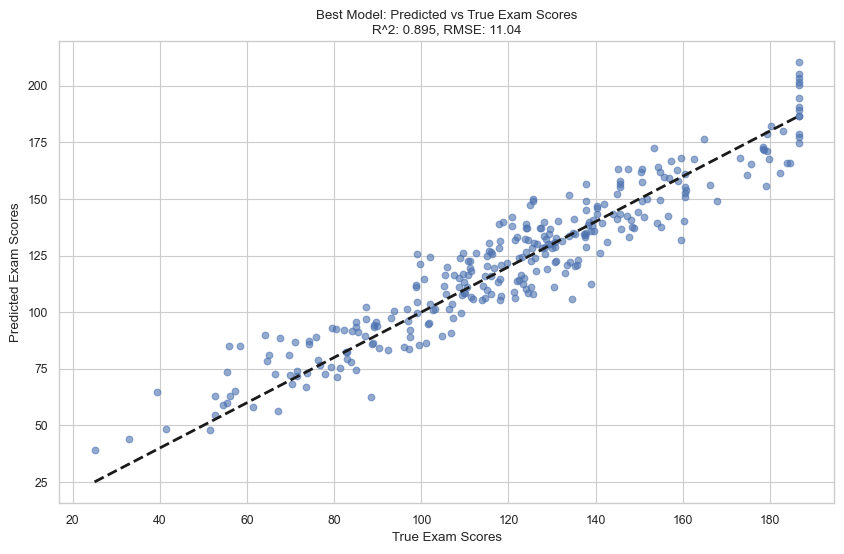

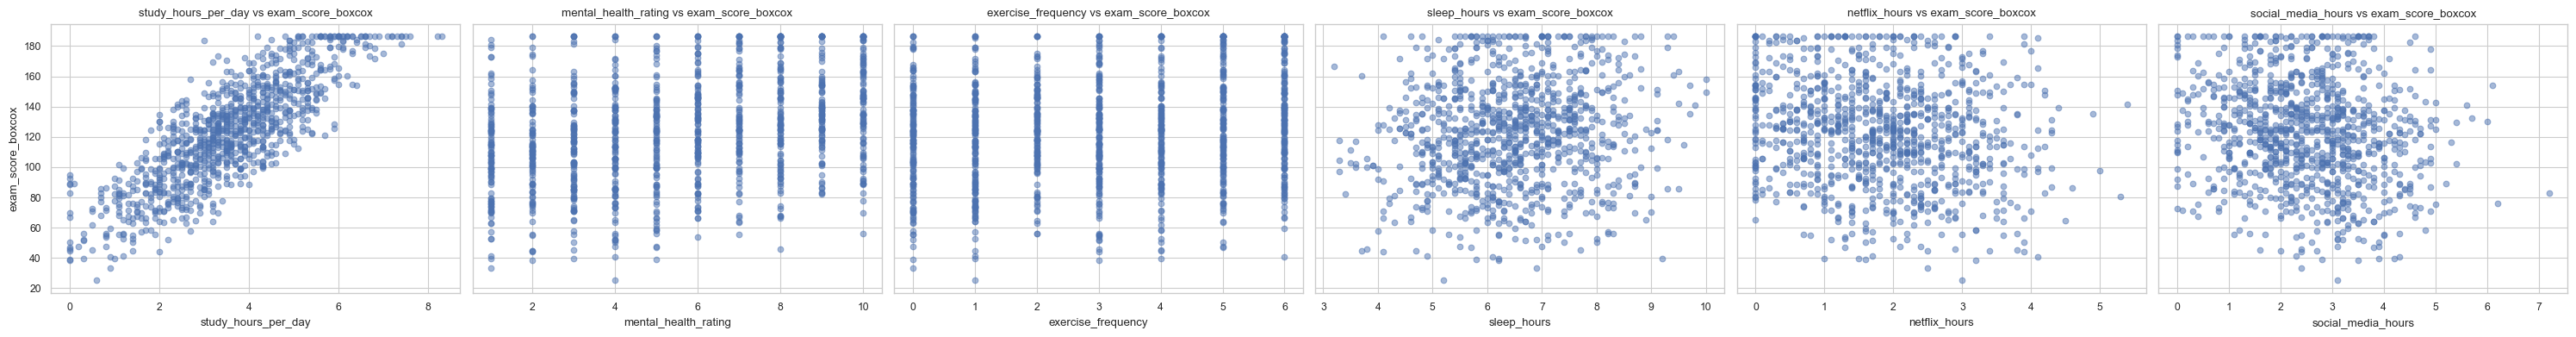

In [69]:
top_combo = results_sorted[0]['predictors']
print(f"Best combination of predictors: {top_combo}")

# Train a linear regression model with the best predictors
X_best = df[list(top_combo)]
y_best = df[target]
X_train, X_test, y_train, y_test = train_test_split(X_best, y_best, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluate the model
rmse_best = root_mean_squared_error(y_test, y_pred)
r2_best = r2_score(y_test, y_pred)
print(f"Best Model RMSE: {rmse_best:.2f}, R^2: {r2_best:.3f}")

# Plotting the best model predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title(f"Best Model: Predicted vs True Exam Scores\nR^2: {r2_best:.3f}, RMSE: {rmse_best:.2f}")
plt.show()

# Possible improvements:
  # look at each individual feature's distribution and relationship with exam scores
  # consider feature engineering, such as creating interaction terms or polynomial features

  # Visualize each predictor vs. target in scatterplots using subplots
  
predictor_list = list(top_combo)
n_predictors = len(predictor_list)
fig, axes = plt.subplots(1, n_predictors, figsize=(5 * n_predictors, 4), sharey=True)

for i, predictor in enumerate(predictor_list):
  ax = axes[i] if n_predictors > 1 else axes
  ax.scatter(df[predictor], df[target], alpha=0.5)
  ax.set_xlabel(predictor)
  if i == 0:
    ax.set_ylabel(target)
  ax.set_title(f"{predictor} vs {target}")

plt.tight_layout()
plt.show()
